In [43]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Open annotated propaganda tweets

In [44]:
with open('../../../data/tweets_vips_annotated.json') as f:
    propaganda_tweets = json.load(f)

Open file with political representatives handles

In [45]:
vips = pd.read_csv("../../../data/twitter_representatives_handles_final.csv")

Add info on author and party to annotated tweets

In [46]:
tweets = []
for tweet in propaganda_tweets:
    tweet_id = tweet
    created_at = propaganda_tweets[tweet]['created_at']
    author_id = propaganda_tweets[tweet]['author_id']
    party = vips[vips['ids'] == author_id]['Party'].values[0]
    name = vips[vips['ids'] == author_id]['Name'].values[0]
    if "annotations" not in propaganda_tweets[tweet]:
        continue
    annotations = [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]
    tweets.append([tweet_id, created_at, author_id, party, name, annotations])

df = pd.DataFrame(tweets, columns=['tweet_id', 'created_at', 'author_id', 'party', 'name', 'annotations'])

Define reference swing periods

In [47]:
start_before = '2022-07-01'
start_during = '2022-08-26'
start_after = '2022-09-25'
end_after = '2022-10-31'

In [48]:
# create "period" column conditional on created_at
df['period'] = 'before'
df.loc[df['created_at'] >= start_during, 'period'] = 'during'
df.loc[df['created_at'] >= start_after, 'period'] = 'after'

# Techniques by representatives

In [49]:
# compute baseline of % of tweets containing each annotation
total_tweets = len(df)
total_annotations = df['annotations'].explode().count()
baseline = df['annotations'].explode().value_counts() / total_annotations
baseline

Doubt                               0.290593
Loaded_Language                     0.113754
Slogans                             0.113407
Appeal_to_Values                    0.105099
Questioning_the_Reputation          0.080585
Conversation_Killer                 0.072719
Flag_Waving                         0.053955
Name_Calling-Labeling               0.053702
Appeal_to_Hypocrisy                 0.028589
False_Dilemma-No_Choice             0.022113
Appeal_to_Fear-Prejudice            0.019649
Appeal_to_Time                      0.010930
Straw_Man                           0.007202
Appeal_to_Popularity                0.006792
Exaggeration-Minimisation           0.006350
Causal_Oversimplification           0.004486
Repetition                          0.002843
Guilt_by_Association                0.002464
Appeal_to_Authority                 0.001327
Consequential_Oversimplification    0.001264
Obfuscation-Vagueness-Confusion     0.001232
Red_Herring                         0.000758
Whatabouti

In [50]:
# get list of unique techniques
techniques = df['annotations'].explode().unique()
techniques

array(['Slogans', 'Conversation_Killer', 'Questioning_the_Reputation',
       'Name_Calling-Labeling', 'Doubt', 'Loaded_Language',
       'Appeal_to_Values', 'Appeal_to_Time', 'Exaggeration-Minimisation',
       'Appeal_to_Hypocrisy', 'False_Dilemma-No_Choice',
       'Appeal_to_Fear-Prejudice', 'Flag_Waving',
       'Consequential_Oversimplification', 'Appeal_to_Popularity',
       'Causal_Oversimplification', 'Repetition', 'Straw_Man',
       'Appeal_to_Authority', 'Whataboutism',
       'Obfuscation-Vagueness-Confusion', 'Red_Herring',
       'Guilt_by_Association'], dtype=object)

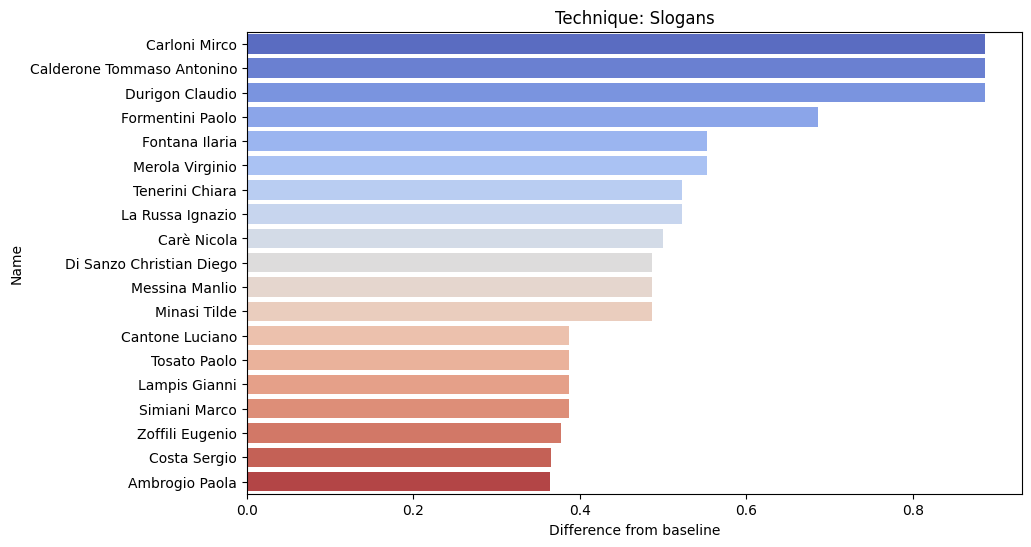

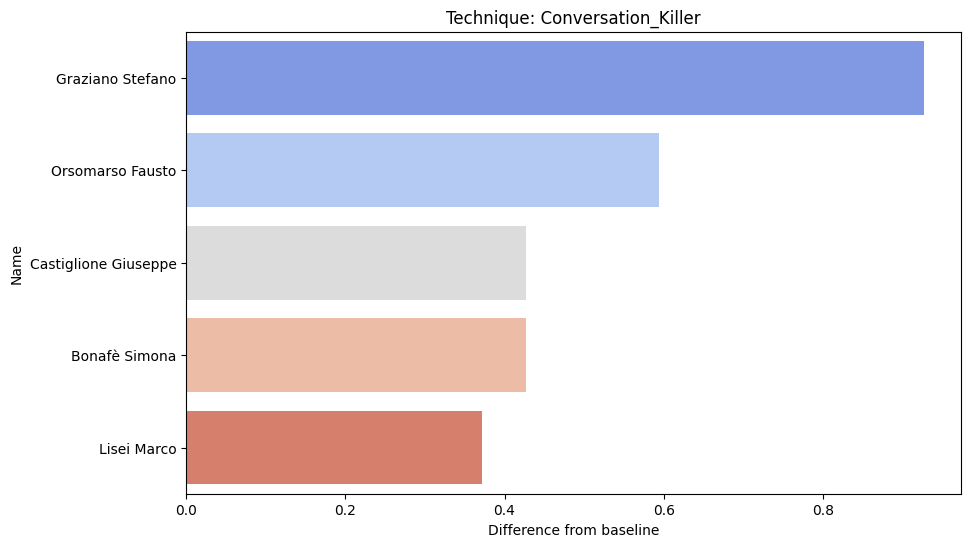

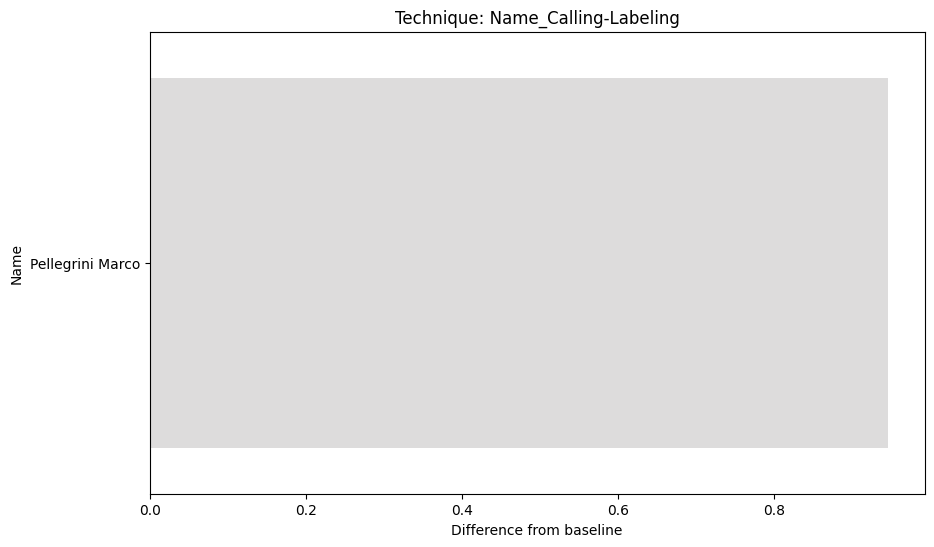

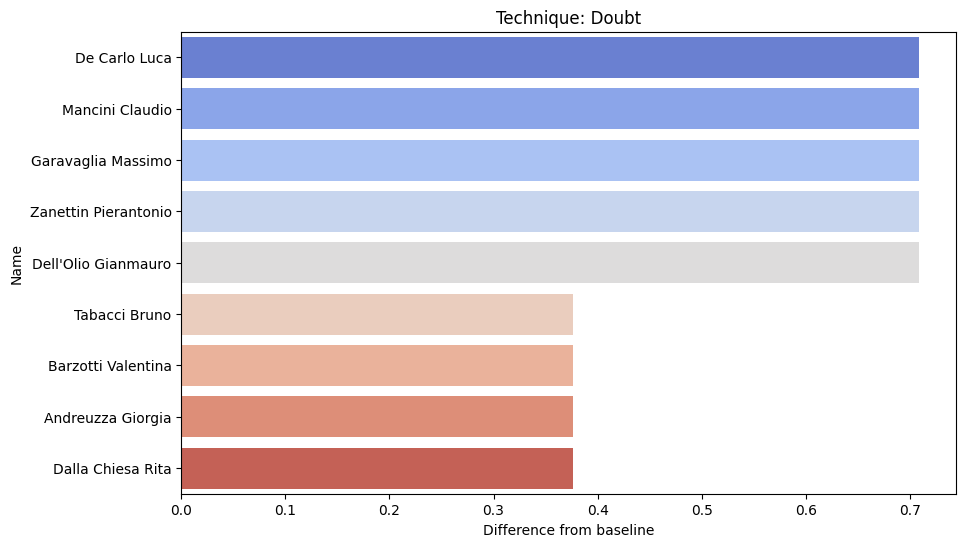

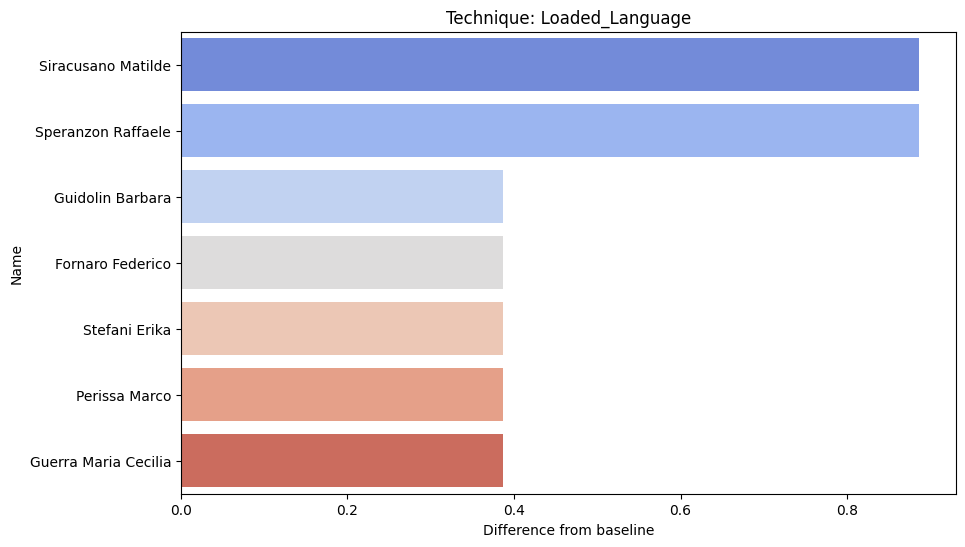

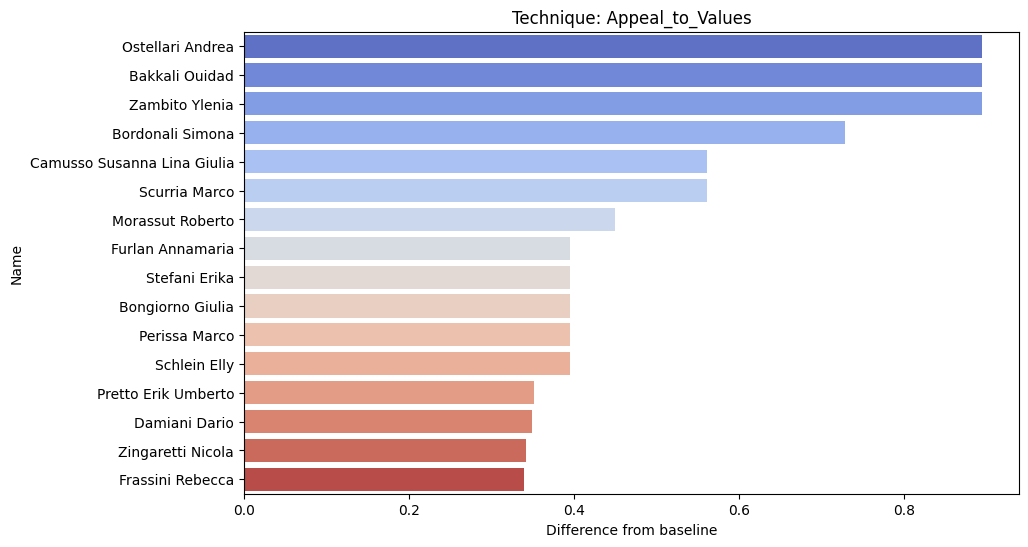

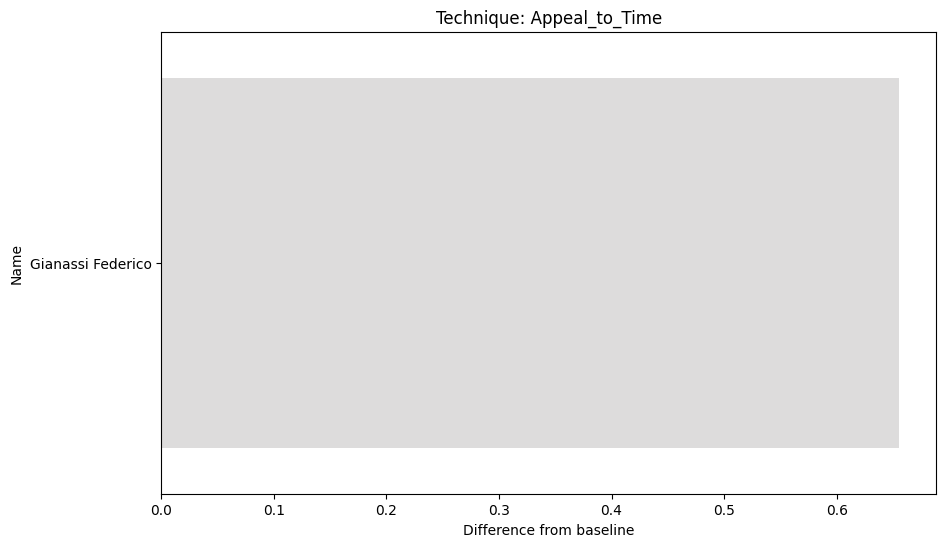

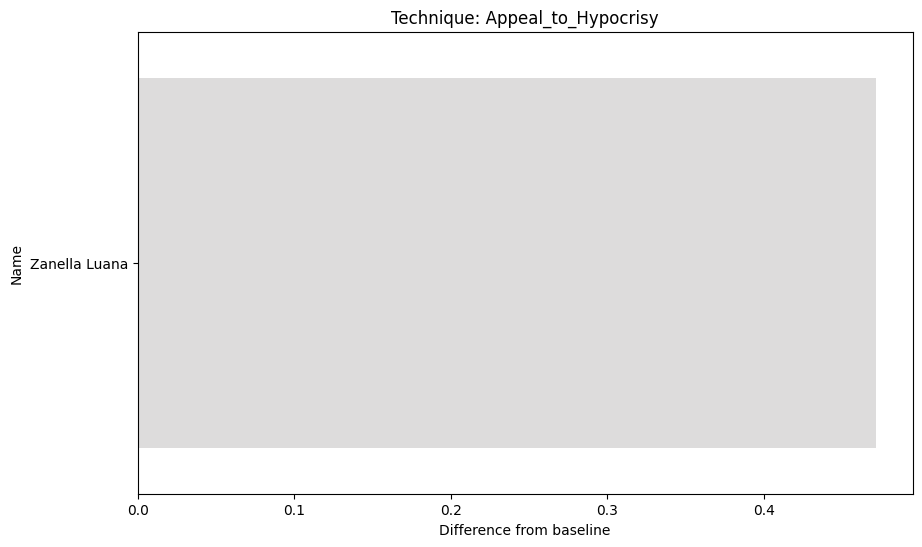

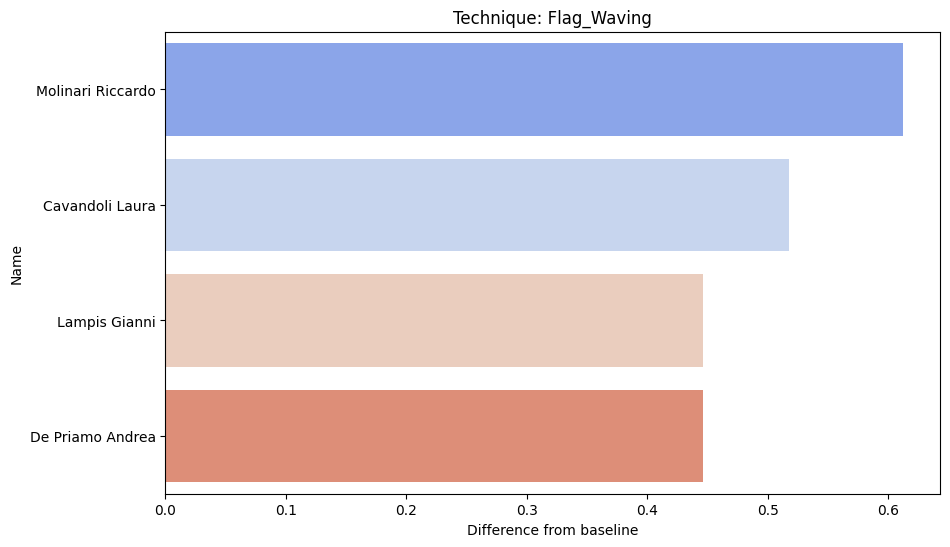

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize empty dictionaries to store data for each party
# Iterate over unique parties
for tech in techniques:
    list_tech_names = []
    for name in df["name"].unique():
        name_annotations = df[df["name"] == name]["annotations"].explode().value_counts()

        # Compute % of tweets containing each annotation by name
        name_annotations_tot = df[df["name"] == name]["annotations"].explode().count()
        name_annotations_perc = name_annotations / name_annotations_tot

        # Compute the difference between party_annotations_perc and baseline
        name_diff = name_annotations_perc - baseline

        # get the difference for the technique
        if tech in name_diff:
            diff = name_diff[tech]
        else:
            diff = 0

        # transform diff = nan to 0
        if pd.isna(diff):
            diff = 0

        if abs(diff) < 0.33:
            continue

        list_tech_names.append([name, diff])


    palette = sns.color_palette("coolwarm", as_cmap=True)


    # plot the difference for the technique
    if len(list_tech_names) > 0:
        df_tech = pd.DataFrame(list_tech_names, columns=["name", "diff"])
        df_tech = df_tech.sort_values("diff", ascending=False)
        plt.figure(figsize=(10, 6))
        
        sns.barplot(x="diff", y="name", data=df_tech, palette="coolwarm")
        plt.title(f"Technique: {tech}")
        plt.xlabel("Difference from baseline")
        plt.ylabel("Name")
        plt.show()
        

# Techniques by representatives and periods

## Before-during

In [52]:
# representatives that are active both before and during
df_before = df[df['period'] == 'before']
df_during = df[df['period'] == 'during']

# get list of names that are active both before and during
names_before = df_before['name'].unique()
names_during = df_during['name'].unique()

names_interest_bd = ["Marattin Luigi", "Faraone Davide", "Cottarelli Carlo",
                    "Berlusconi Silvio", "Zan Alessandro", "Bagnai Alberto",
                    "Conte Giuseppe", "Bonetti Elena", "Soumahoro Aboubakar",
                    "Richetti Matteo", "Renzi Matteo", "Paita Raffaella", 
                    "Boschi Maria Elena", "Calenda Carlo", "Scalfarotto Ivan"]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


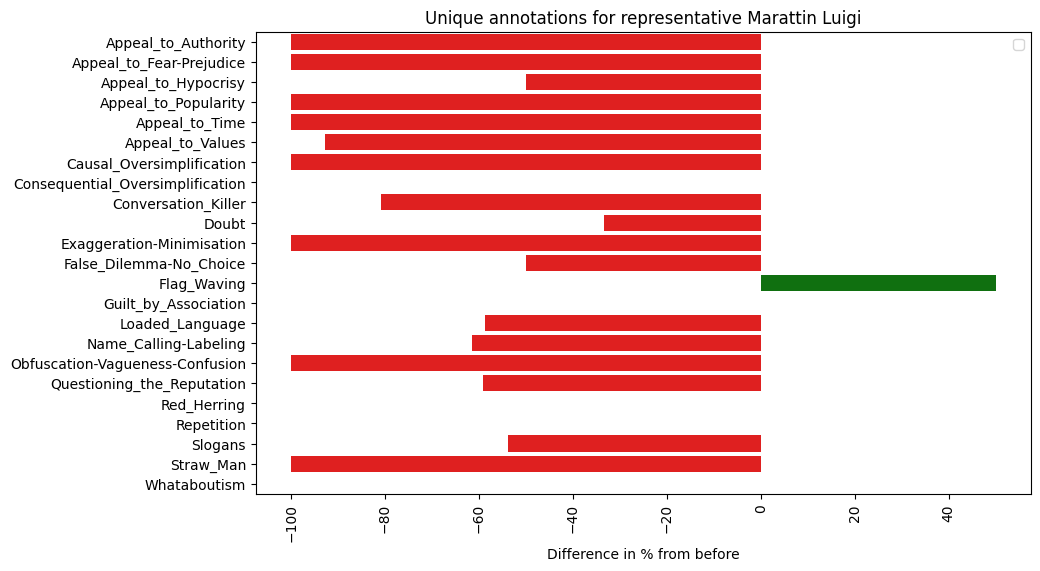

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


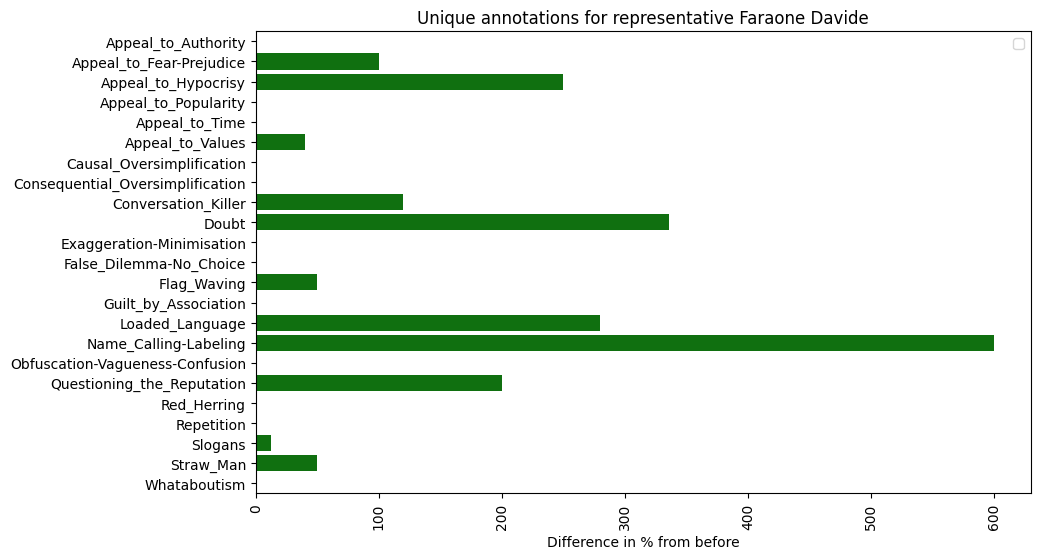

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


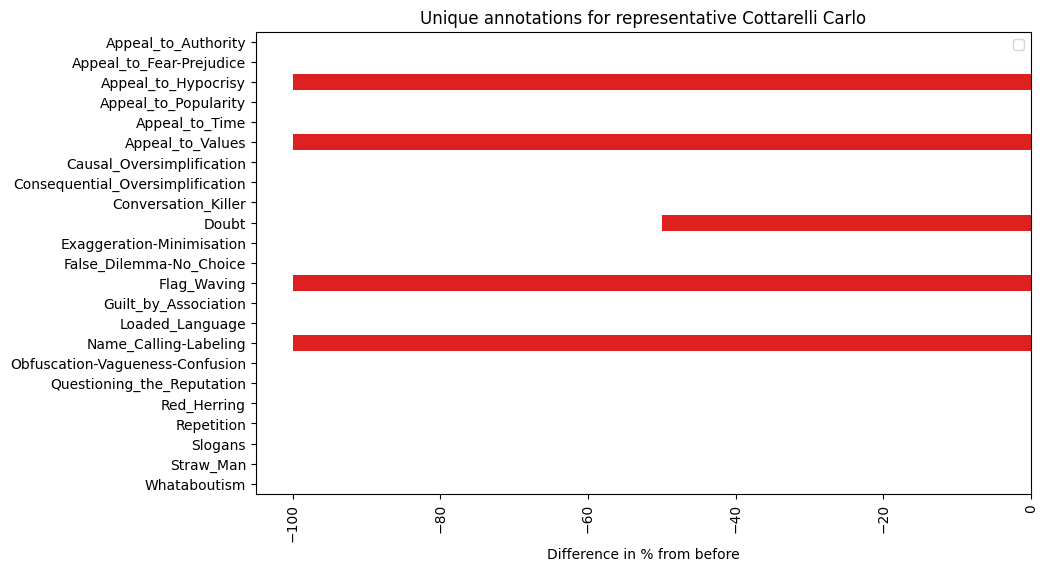

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


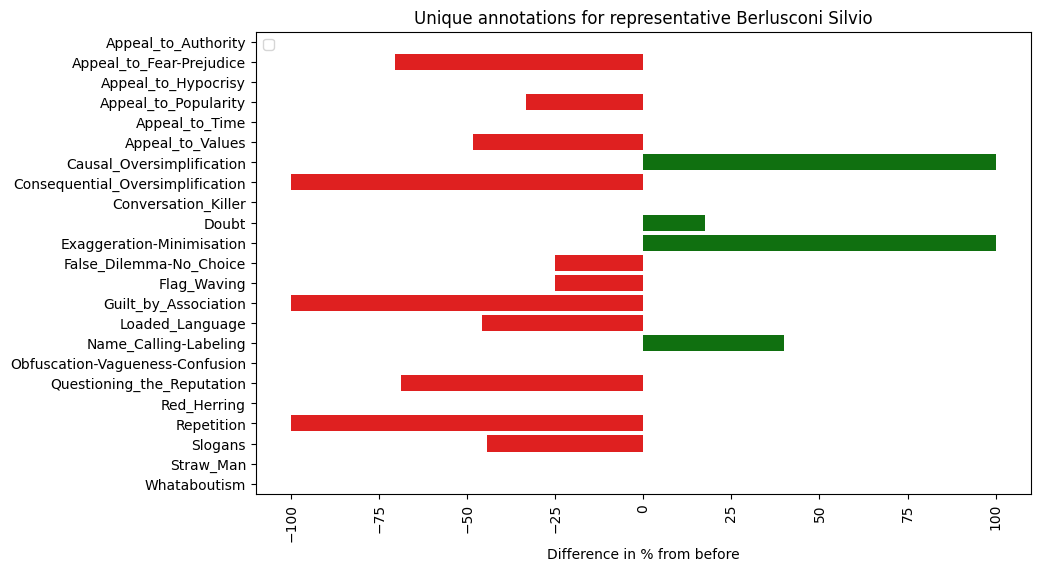

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


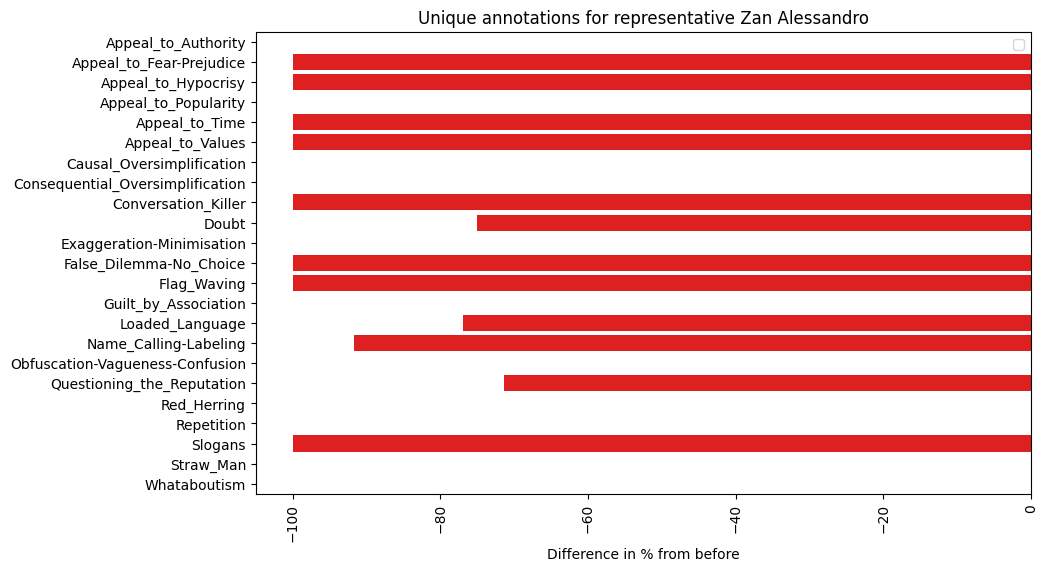

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


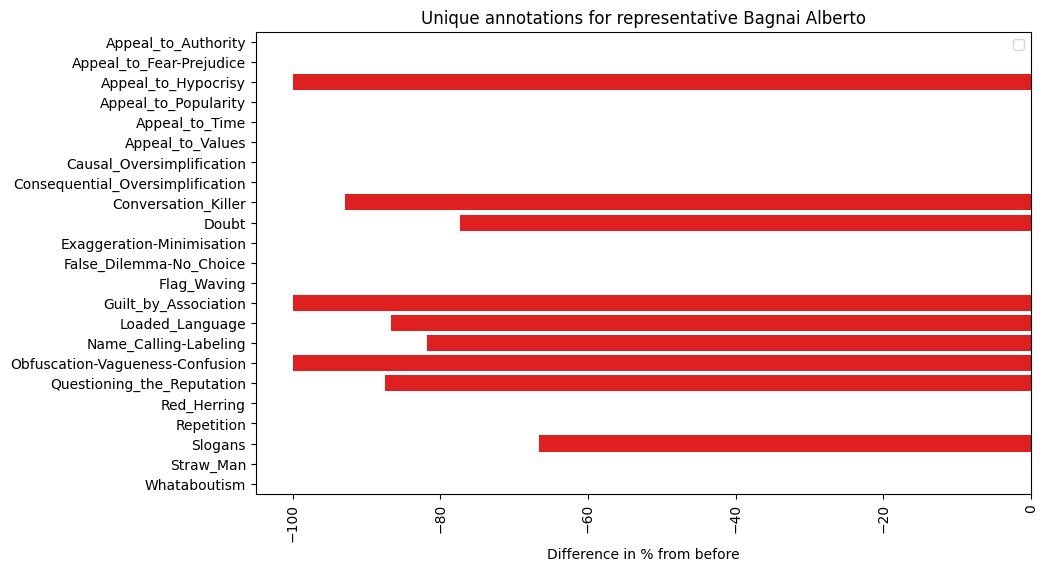

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


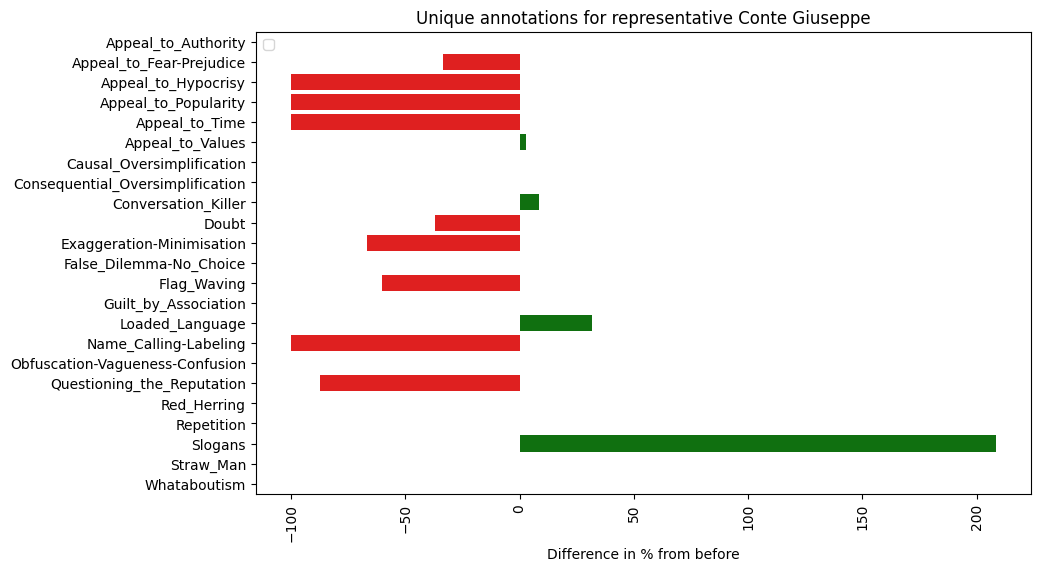

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


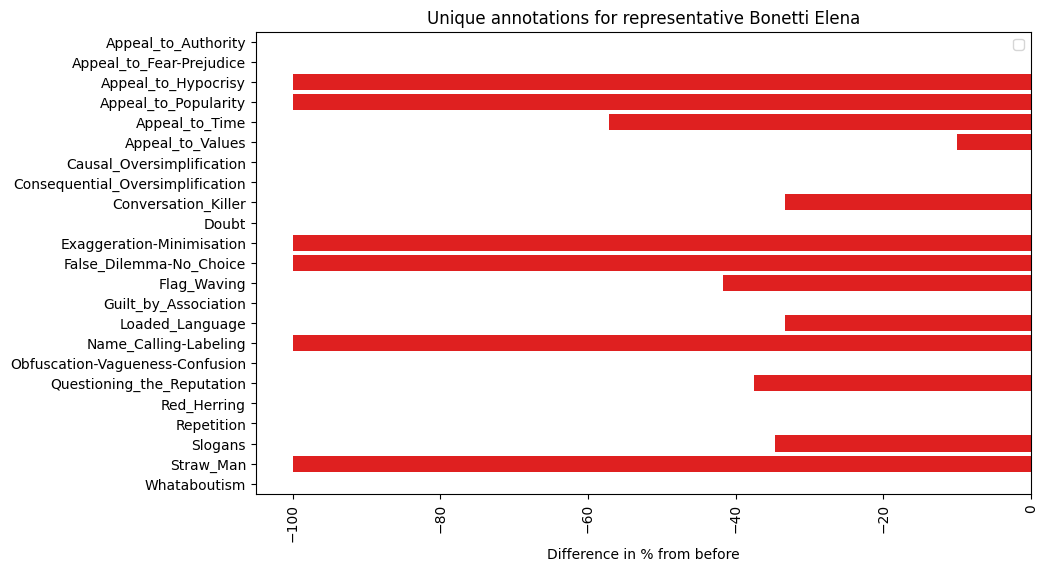

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


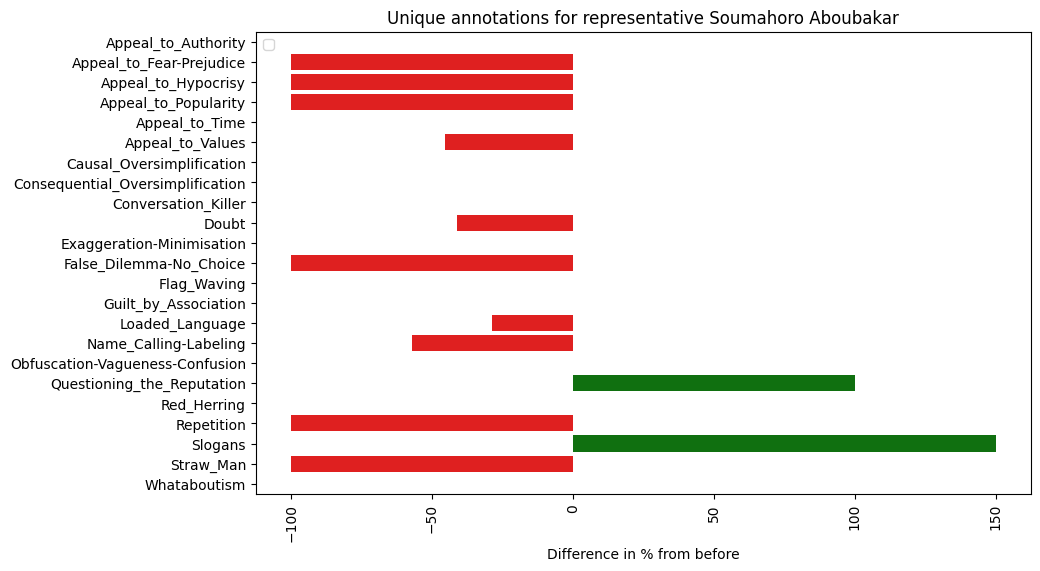

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


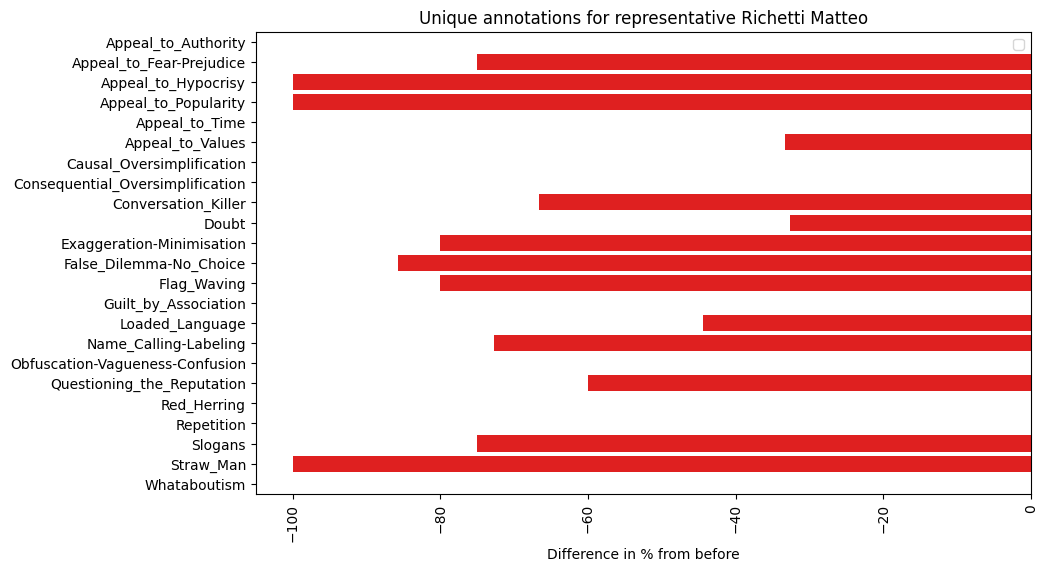

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


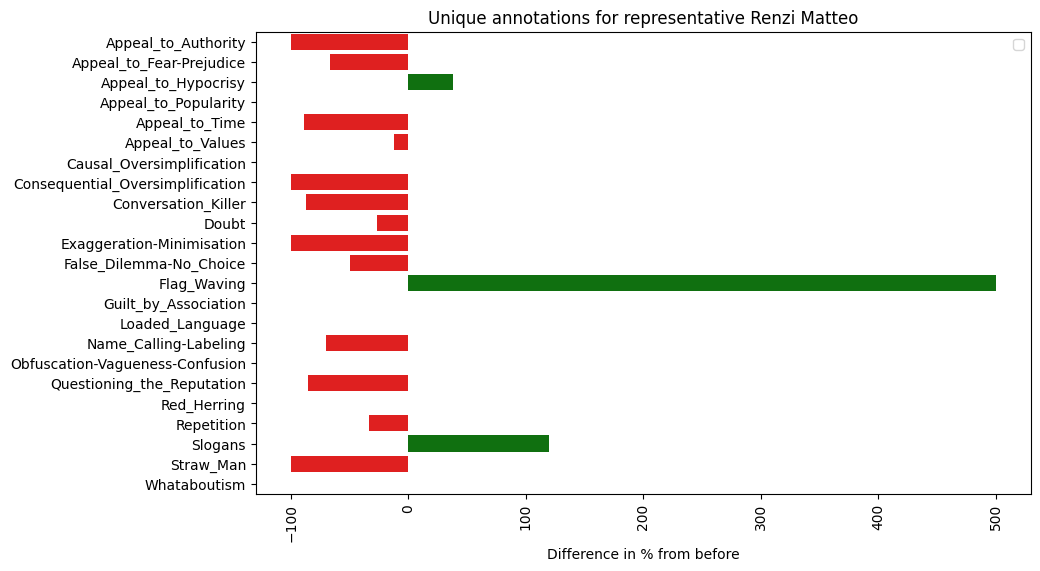

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


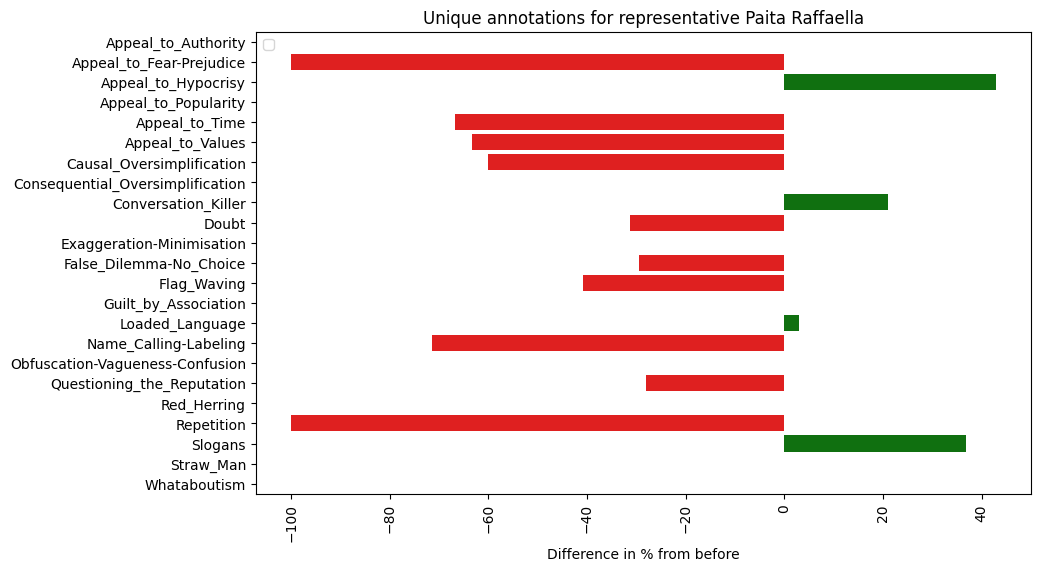

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


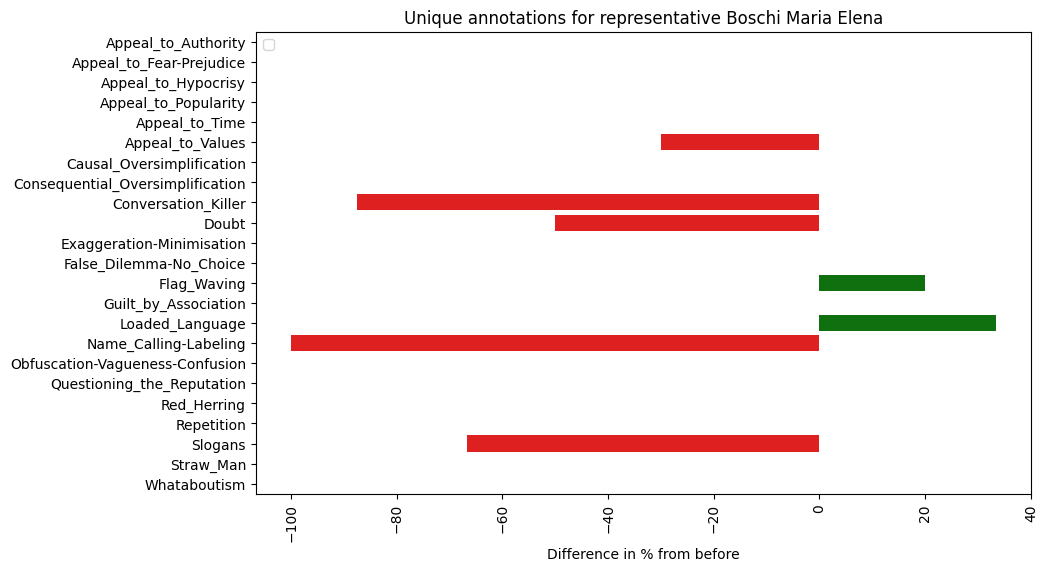

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


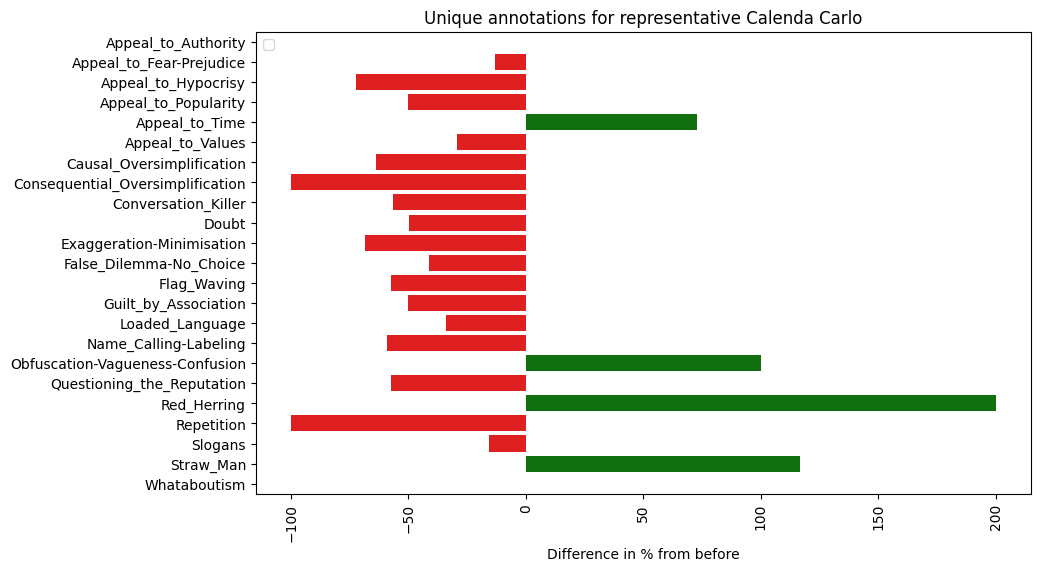

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


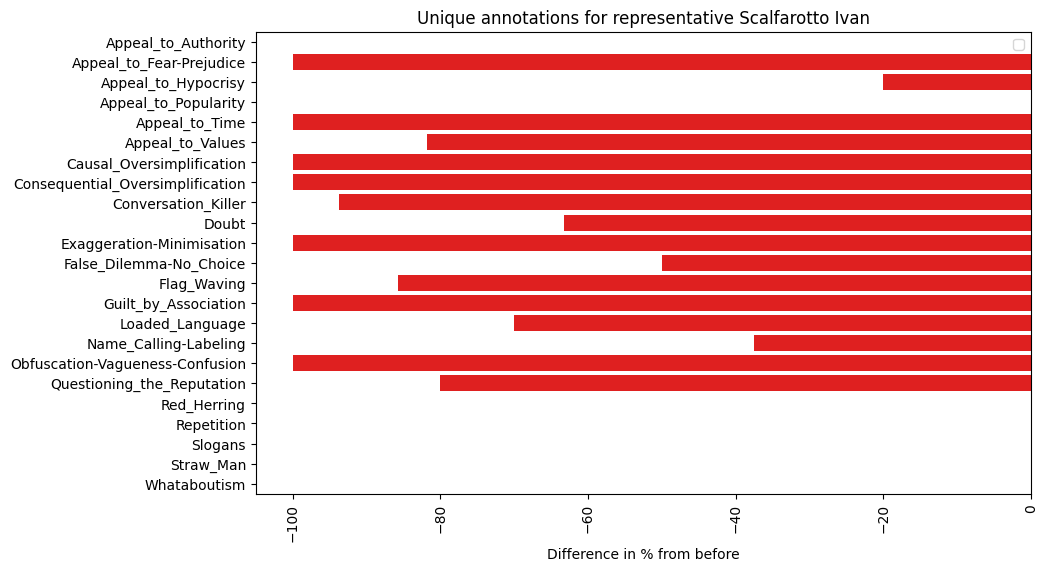

In [64]:
for name in names_interest_bd:

    # before
    name_annotations_before = df[(df["name"] == name) & (df["period"] == "before")]["annotations"].explode().value_counts()
    # during
    name_annotations_during = df[(df["name"] == name) & (df["period"] == "during")]["annotations"].explode().value_counts()

    # add 0s to techniques that are not present
    for tech in techniques:
        if tech not in name_annotations_before:
            name_annotations_before[tech] = 0
        if tech not in name_annotations_during:
            name_annotations_during[tech] = 0

    # % difference in annotations before and during
    name_annotations_diff = ((name_annotations_during - name_annotations_before) / name_annotations_before)*100

    # plot
    plt.figure(figsize=(10, 6))
    # color based on positive or negative difference
    color = ["red" if x < 0 else "green" for x in name_annotations_diff]
    sns.barplot(x=name_annotations_diff, y=name_annotations_diff.index, palette=color)
    plt.title('Unique annotations for representative '+name)
    plt.legend();
    plt.xticks(rotation=90)
    plt.xlabel('Difference in % from before')
    plt.show()

## During-after

In [36]:
# representatives that are active both before and during
df_during = df[df['period'] == 'during']
df_after = df[df['period'] == 'after']

# get list of names that are active both before and during
names_during = df_during['name'].unique()
names_after = df_after['name'].unique()

names_interest_da = ["Renzi Matteo", "Letta Enrico", "Boldrini Laura",
                    "Rosato Ettore", "Evi Eleonora", "Cottarelli Carlo",
                    "Bonetti Elena", "Marattin Luigi", "Zan Alessandro",
                    "Bonifazi Francesco", "Calenda Carlo", "Fratoianni Nicola",
                    "Fina Michele", "Delmastro Delle Vedove Andrea", "Conte Giuseppe",
                    "Faraone Davide"]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


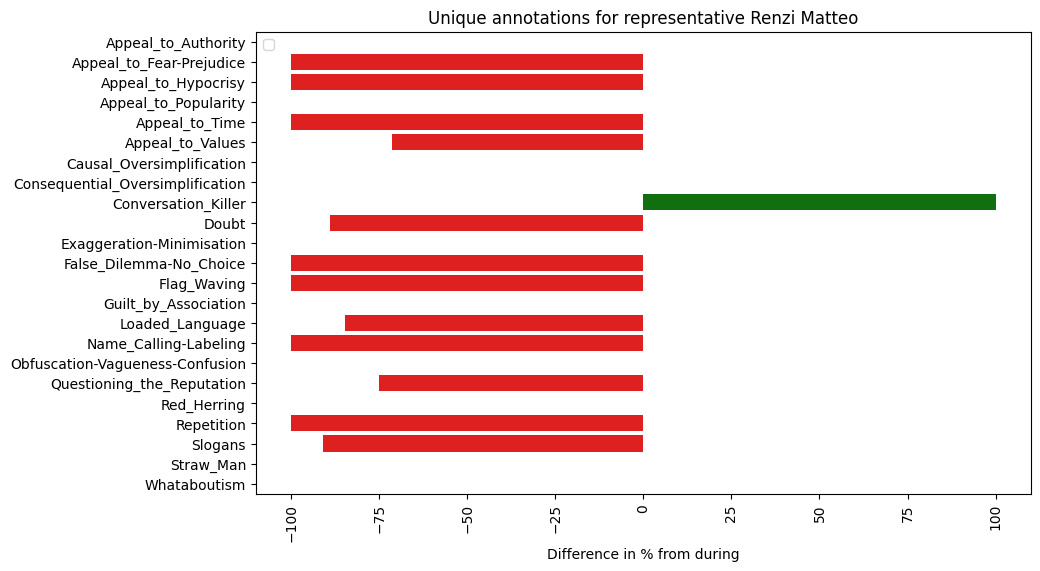

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


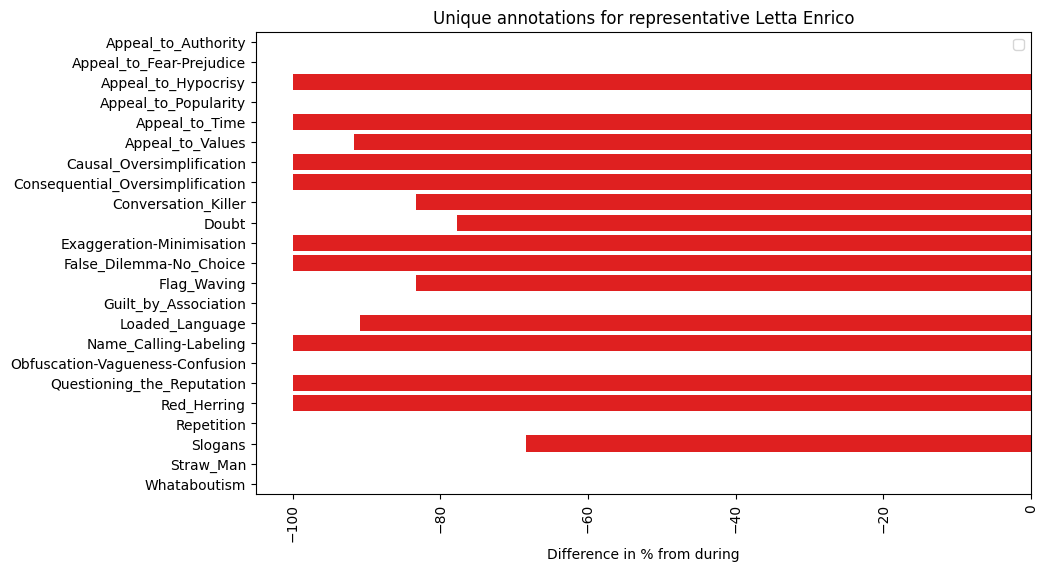

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


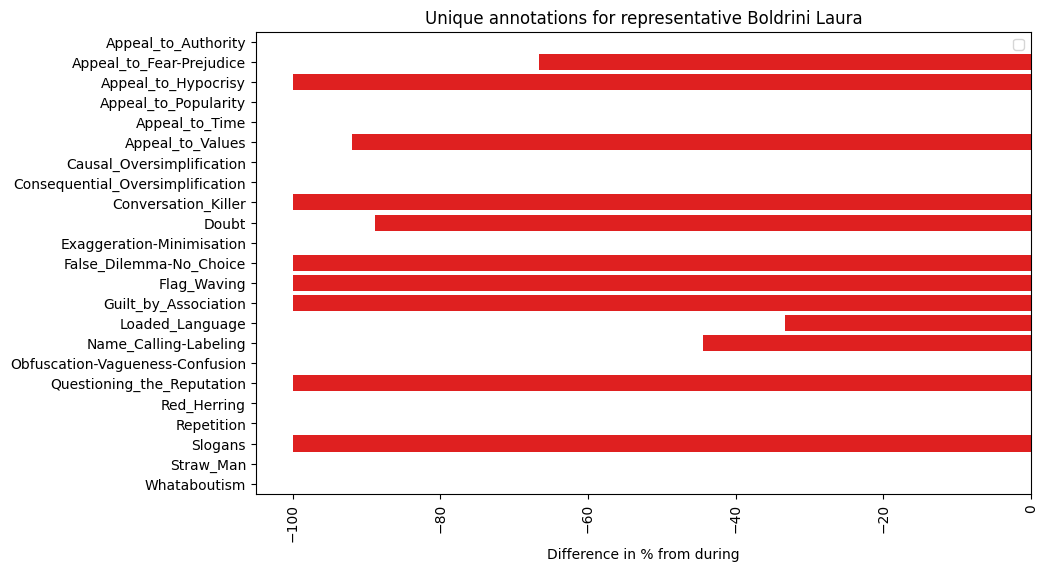

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


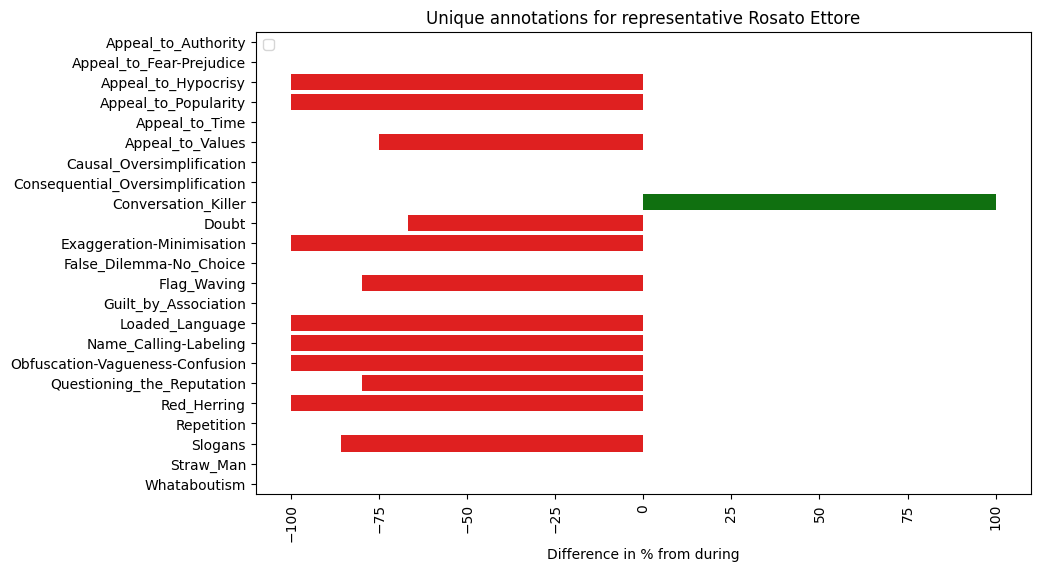

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


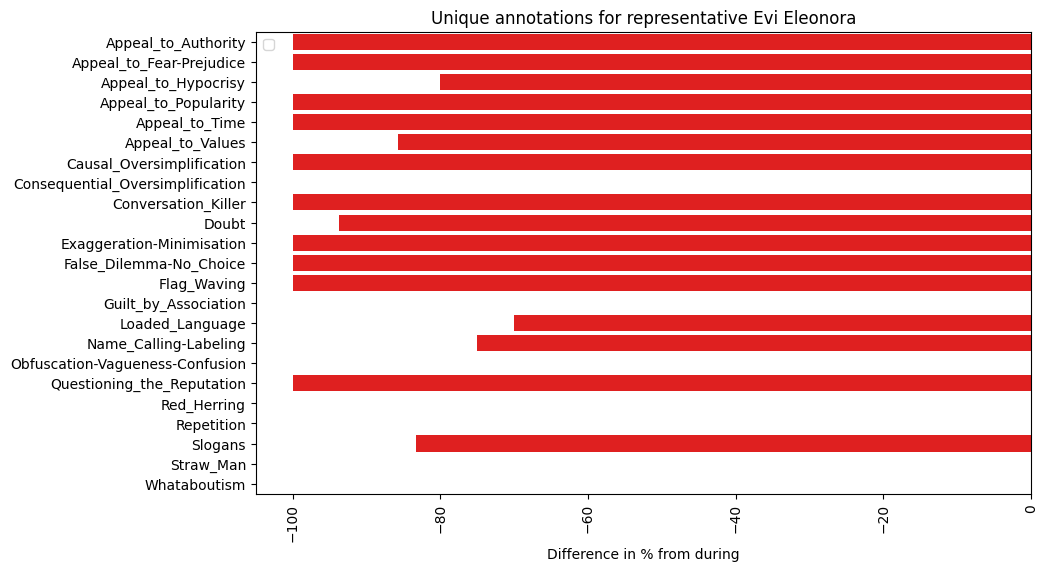

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


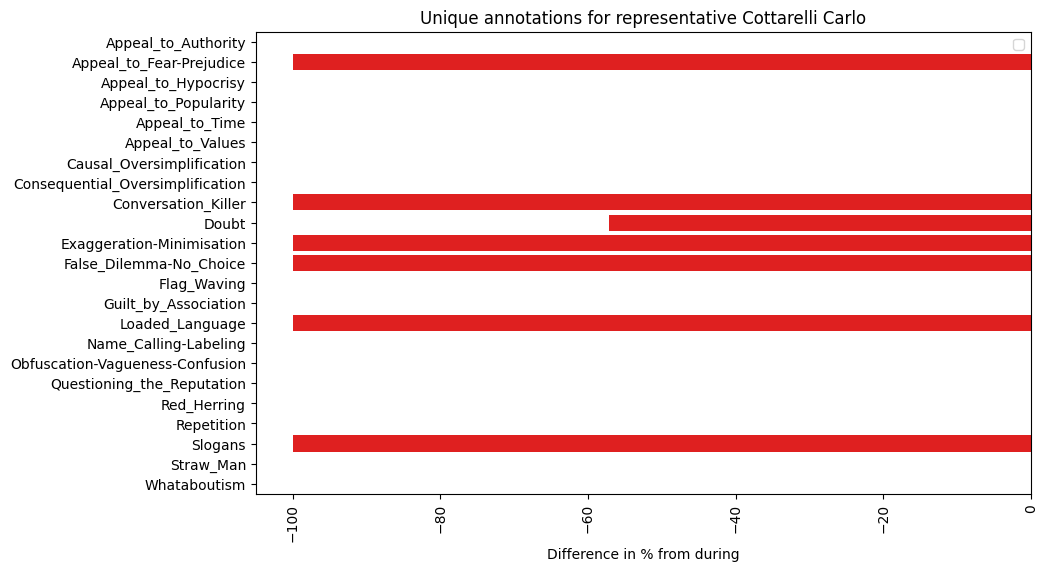

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


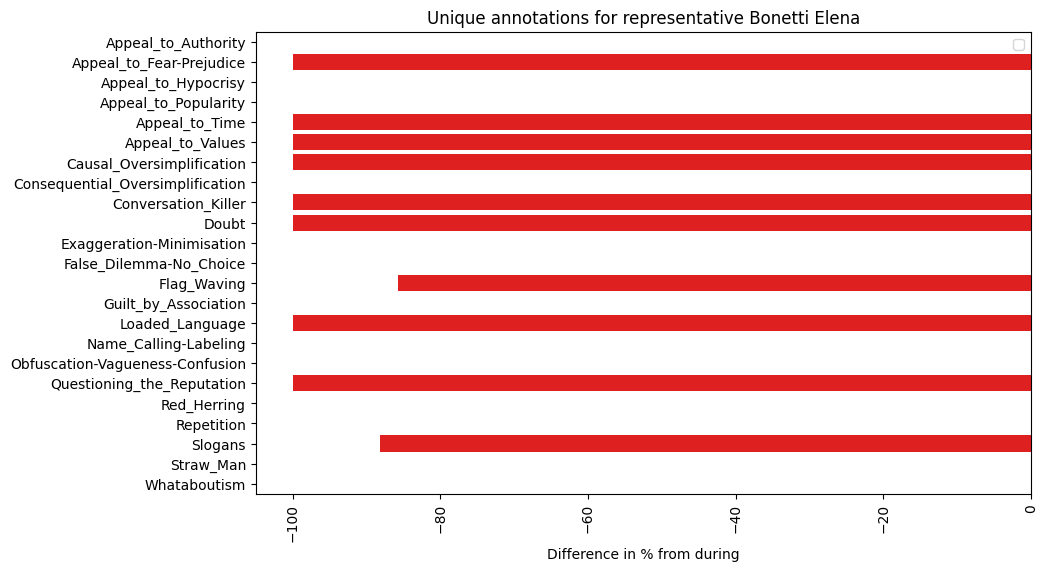

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


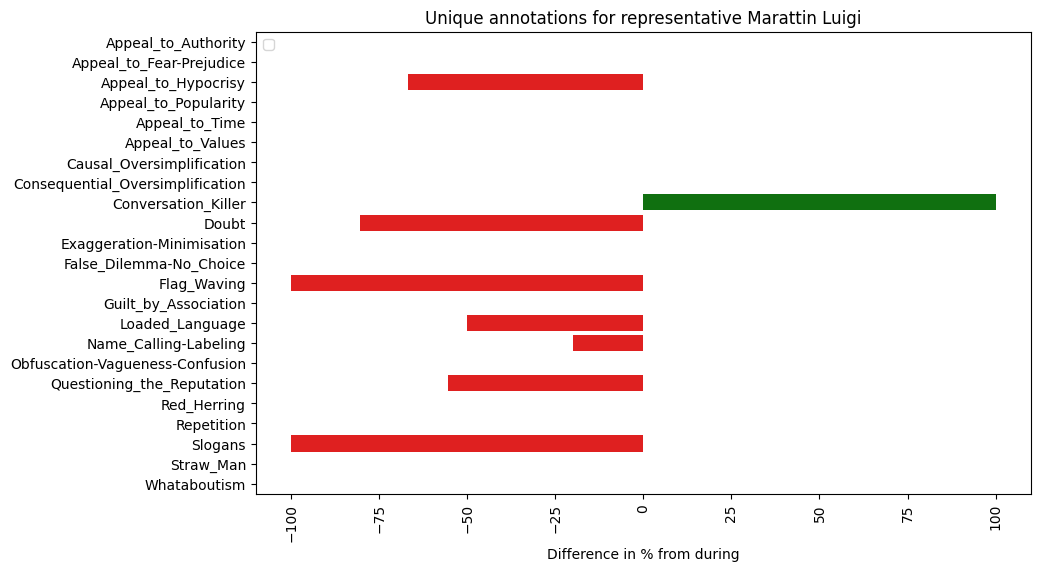

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


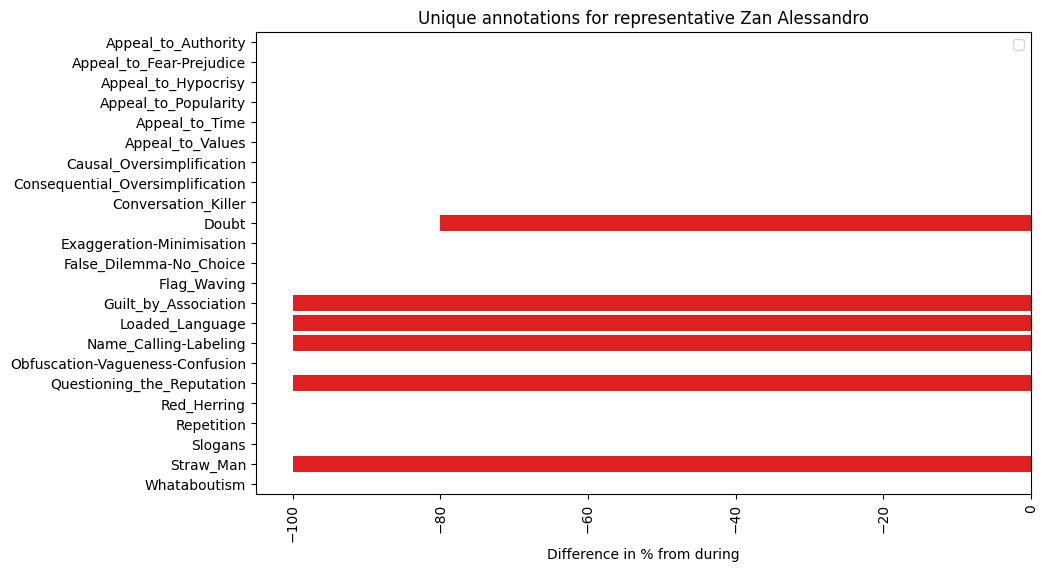

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


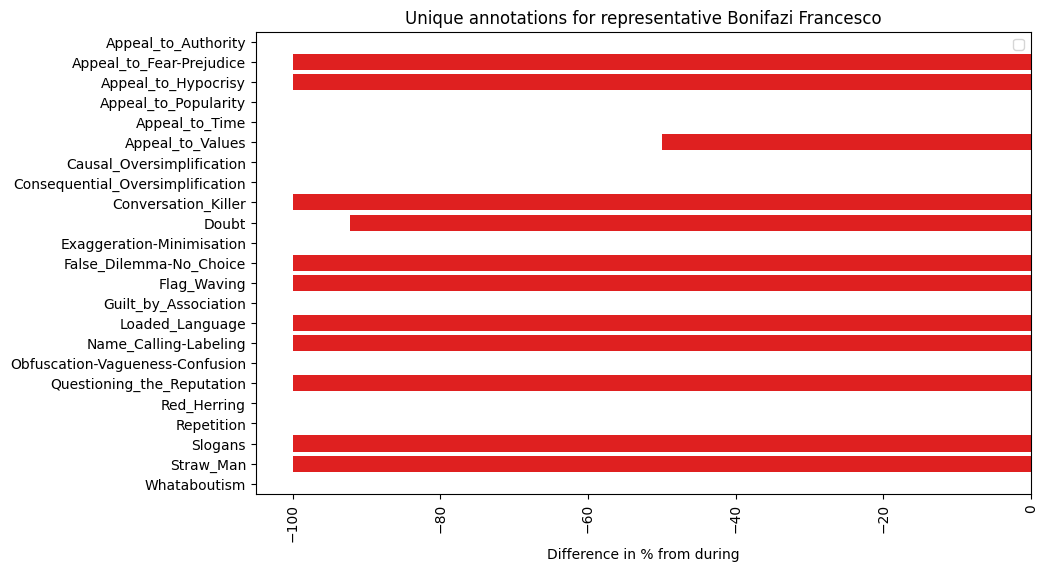

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


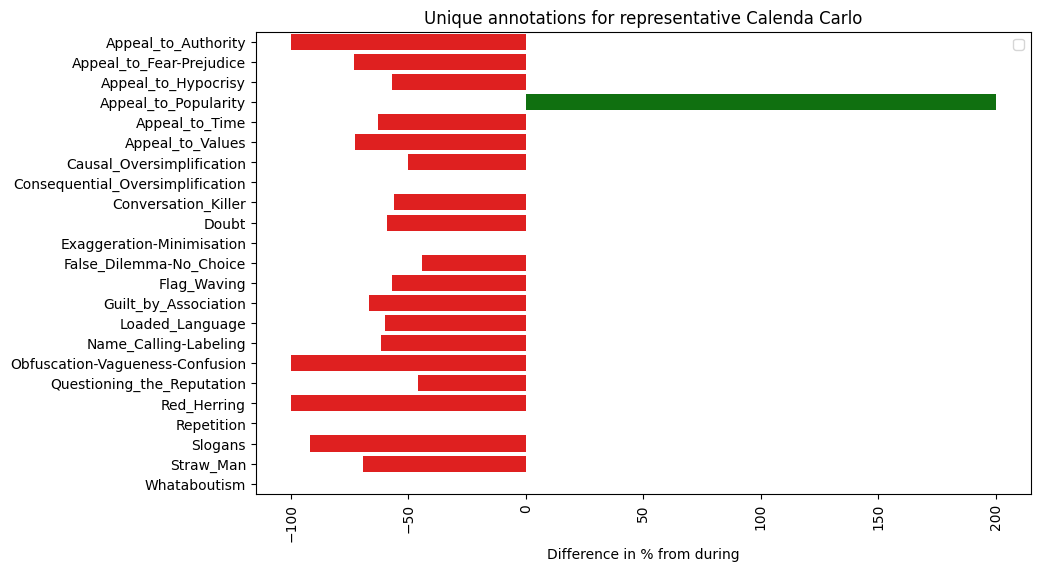

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


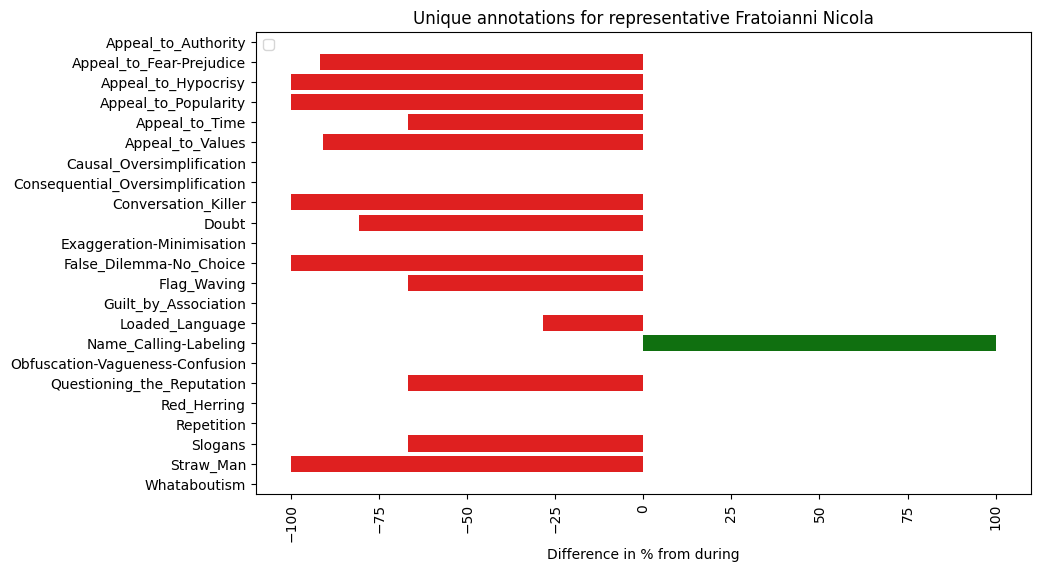

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


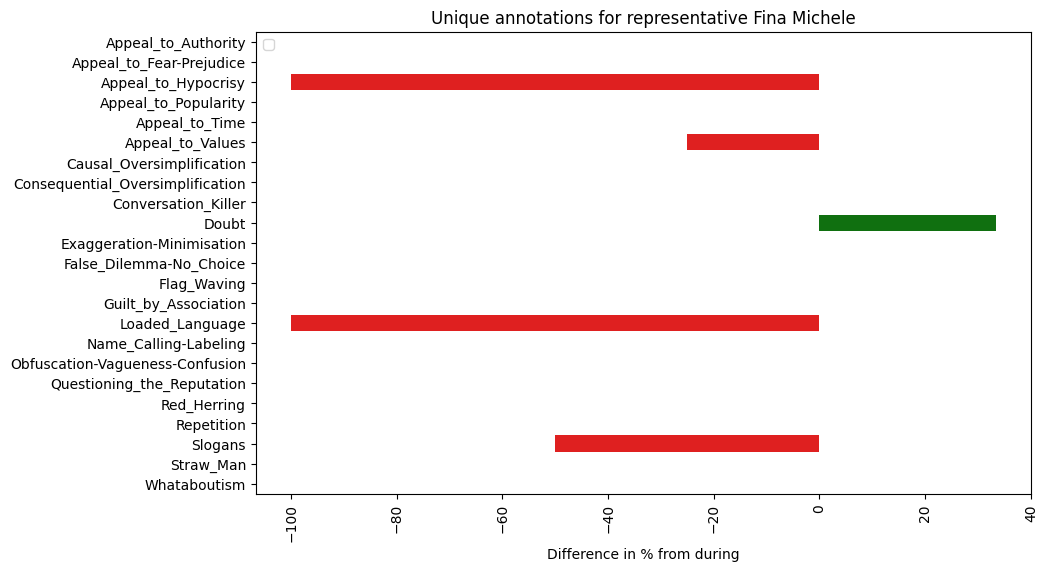

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


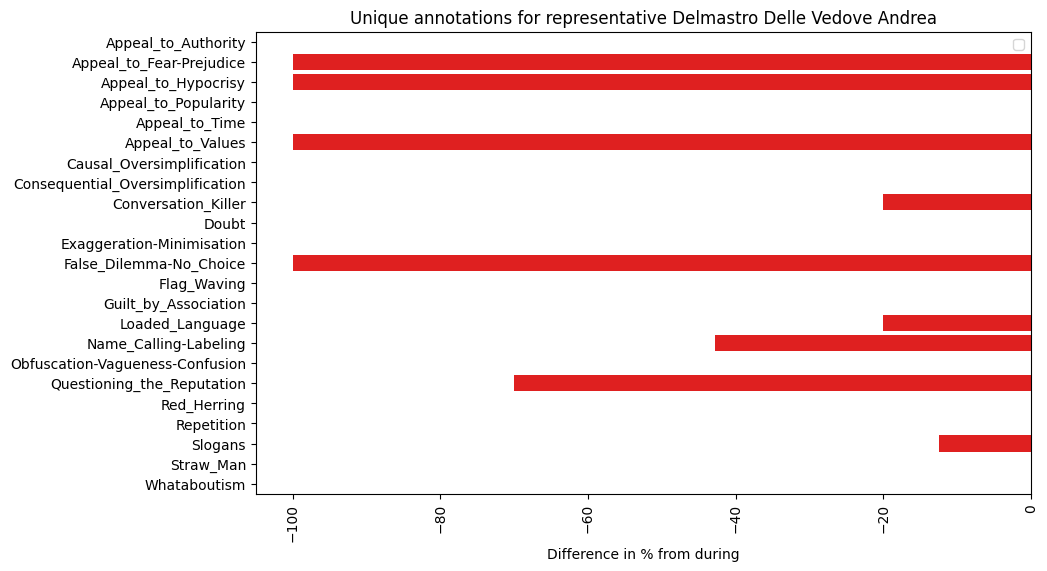

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


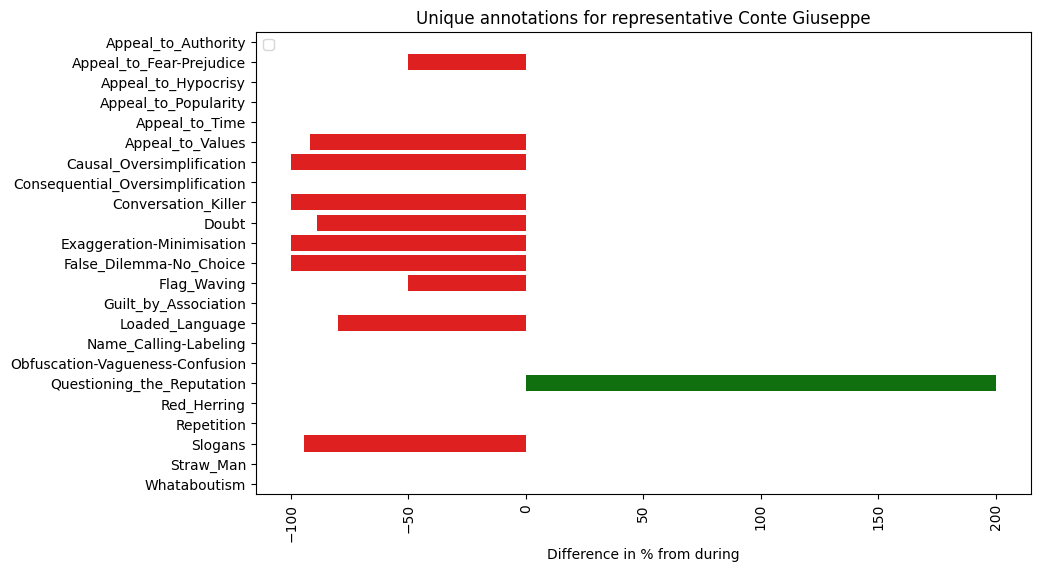

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


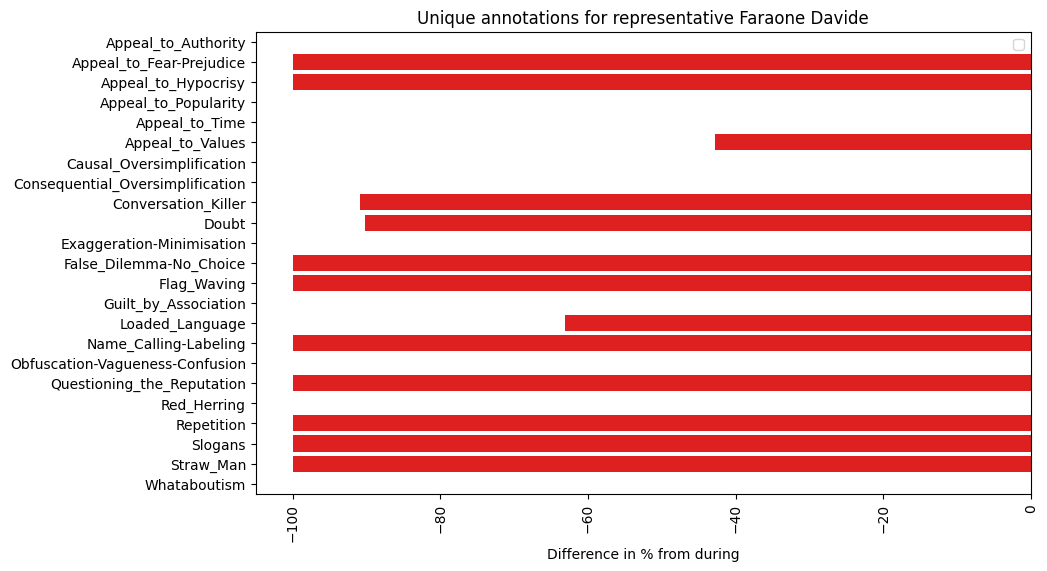

In [66]:
for name in names_interest_da:

    # before
    name_annotations_during = df[(df["name"] == name) & (df["period"] == "during")]["annotations"].explode().value_counts()
    # during
    name_annotations_after = df[(df["name"] == name) & (df["period"] == "after")]["annotations"].explode().value_counts()

    # add 0s to techniques that are not present
    for tech in techniques:
        if tech not in name_annotations_during:
            name_annotations_during[tech] = 0
        if tech not in name_annotations_after:
            name_annotations_after[tech] = 0

    # % difference in annotations before and during
    name_annotations_diff = ((name_annotations_after - name_annotations_during) / name_annotations_during)*100

    # plot
    plt.figure(figsize=(10, 6))
    # color based on positive or negative difference
    color = ["red" if x < 0 else "green" for x in name_annotations_diff]
    sns.barplot(x=name_annotations_diff, y=name_annotations_diff.index, palette=color)
    plt.title('Unique annotations for representative '+name)
    plt.legend();
    plt.xticks(rotation=90)
    plt.xlabel('Difference in % from during')
    plt.show()

## Before-after

In [40]:
# representatives that are active both before and during
df_before = df[df['period'] == 'before']
df_after = df[df['period'] == 'after']

# get list of names that are active both before and during
names_before = df_before['name'].unique()
names_after = df_after['name'].unique()

names_interest_ba = ["Renzi Matteo", "Paita Raffaella", "Faraone Davide", 
                     "Provenzano Giuseppe", "Boldrini Laura", "Bonetti Elena",
                     "Conte Giuseppe", "Cottarelli Carlo", "Richetti Matteo",
                     "Soumahoro Aboubakar", "Salvini Matteo", "Calenda Carlo",
                     "Letta Enrico", "Marattin Luigi", "Malan Lucio",
                     "Meloni Giorgia"]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


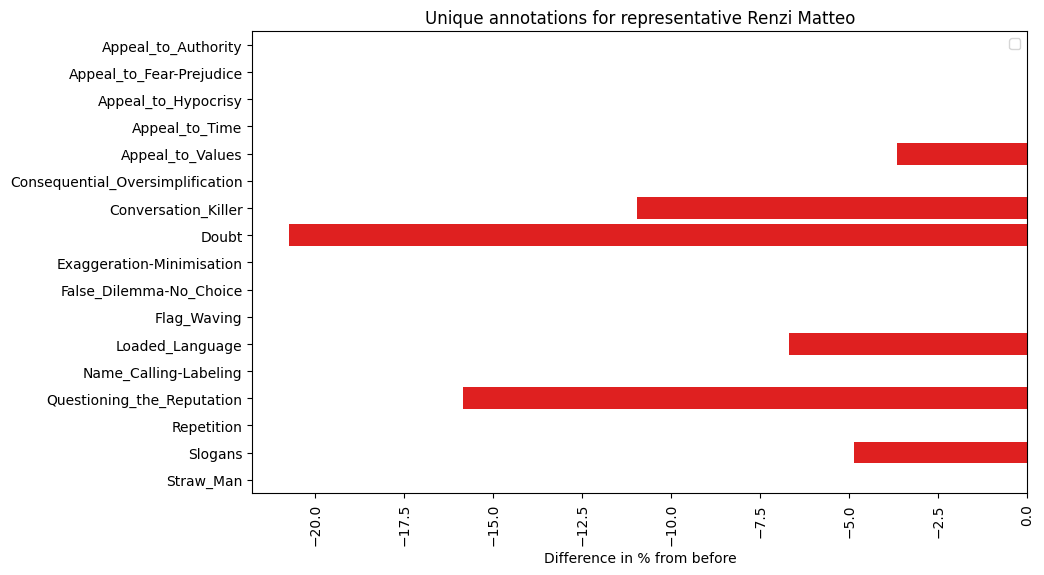

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


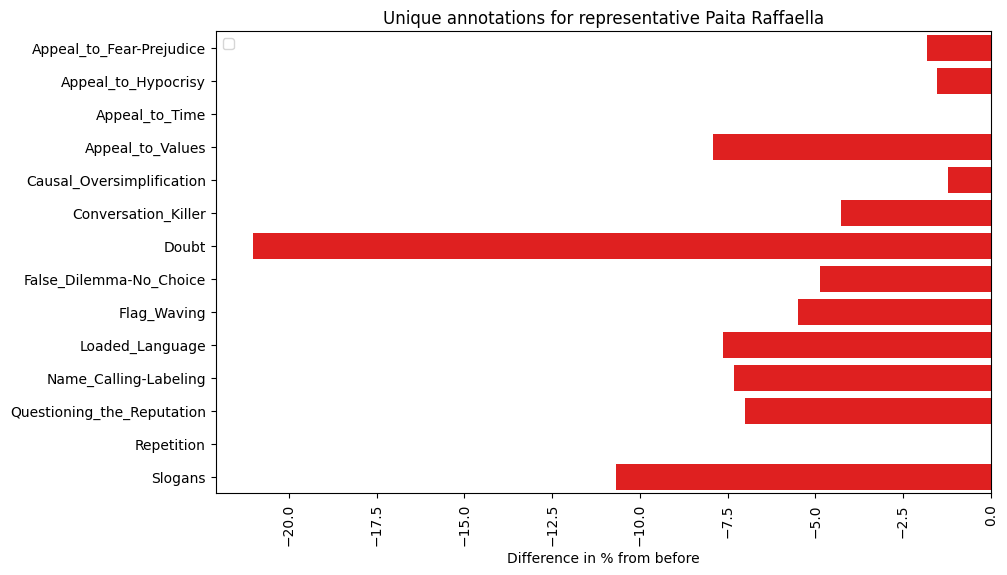

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


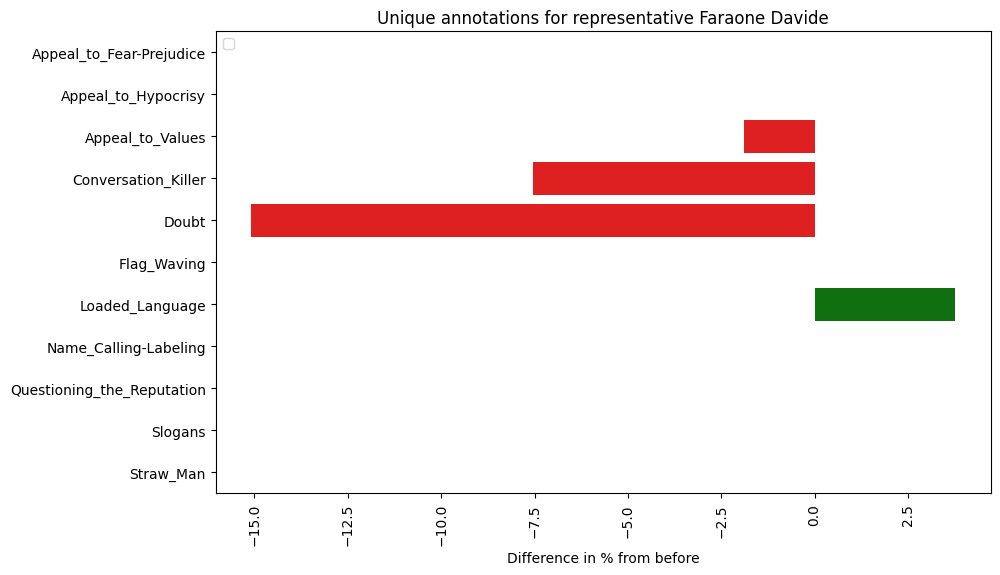

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


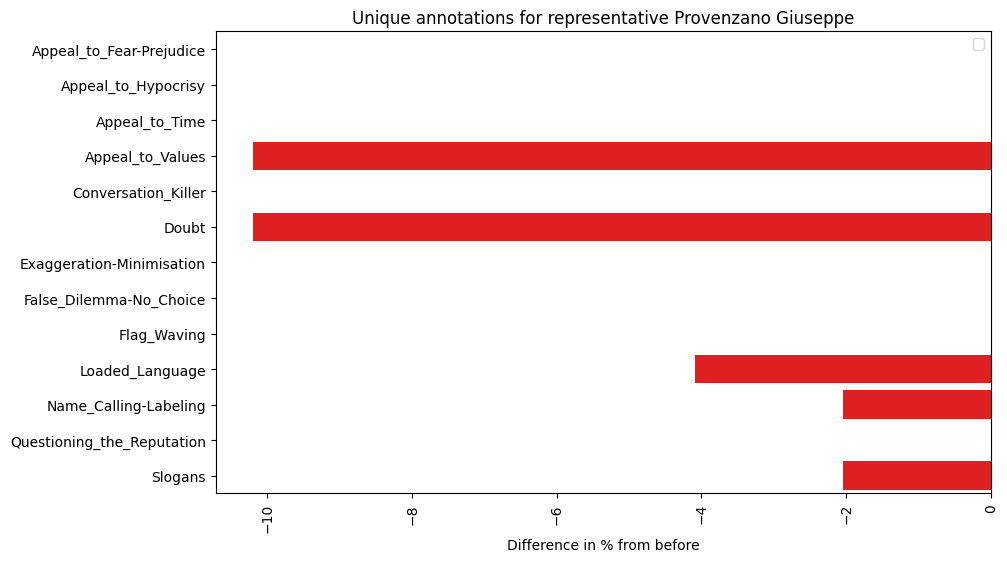

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


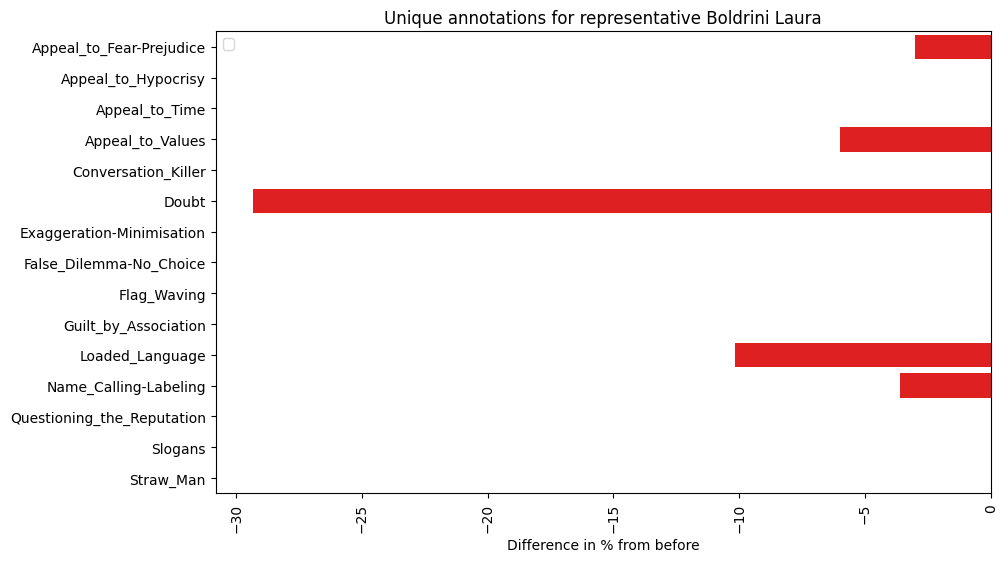

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


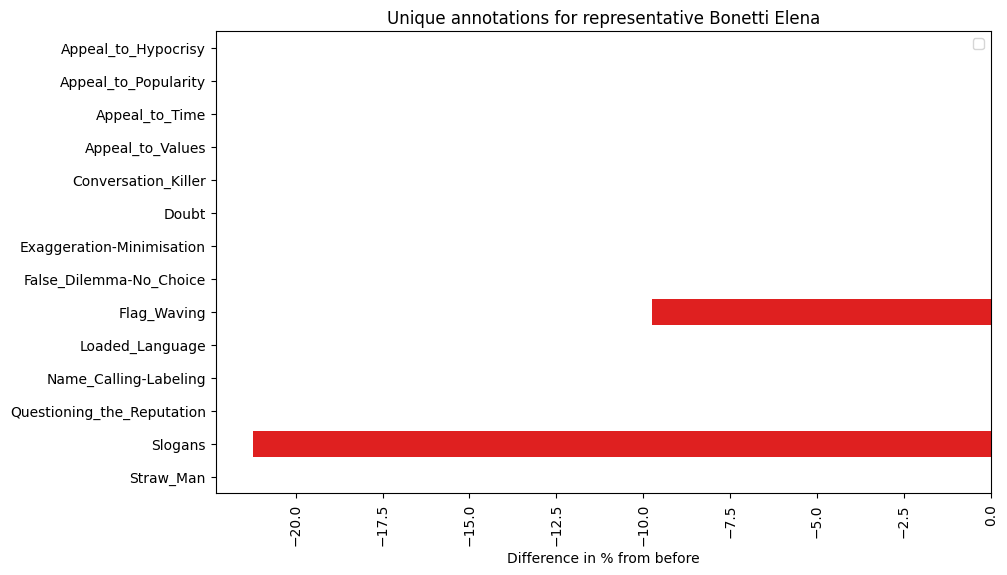

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


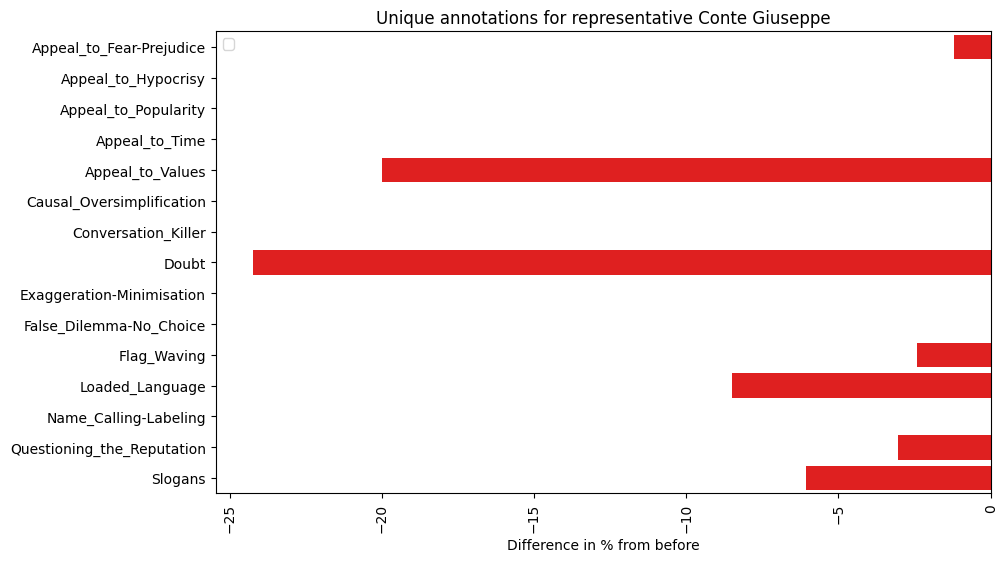

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


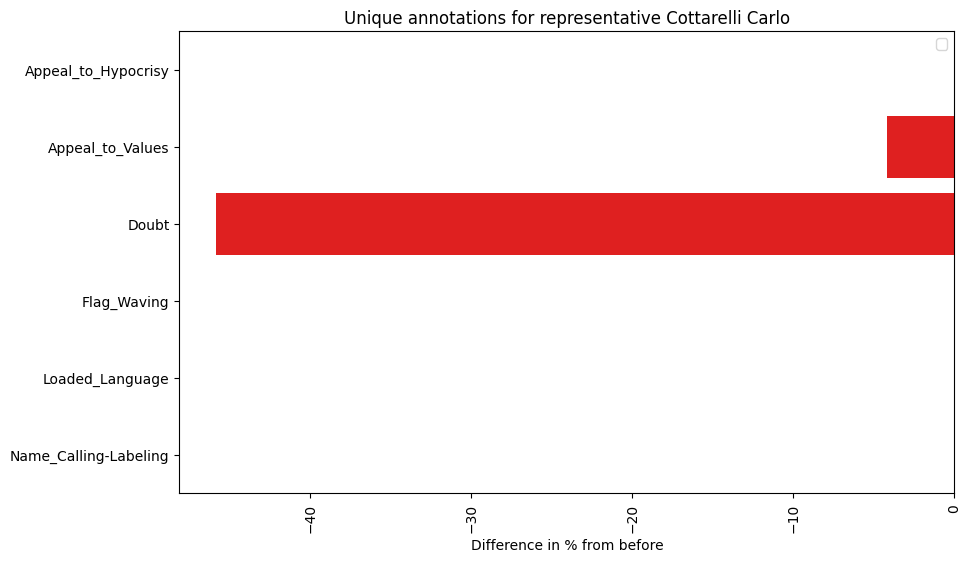

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


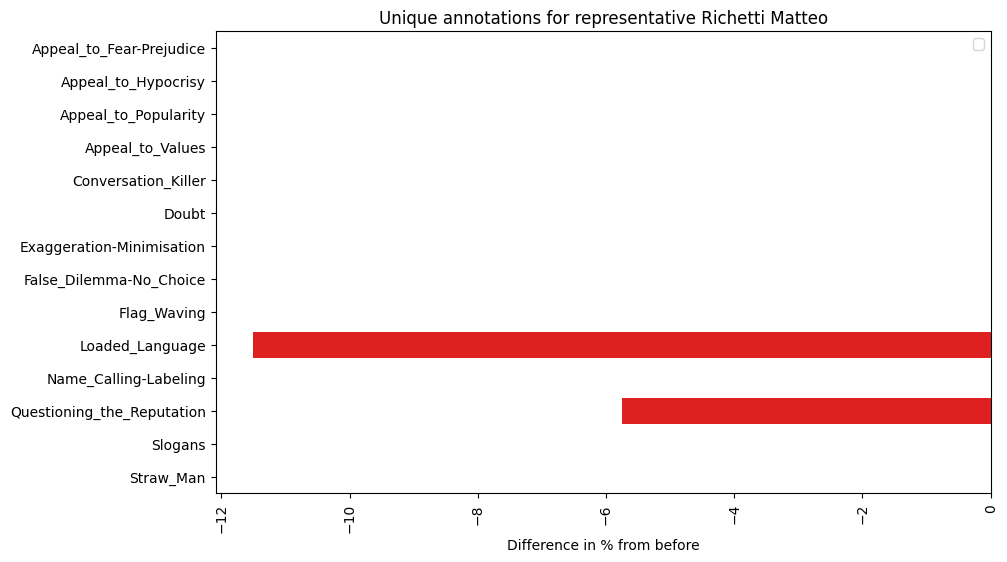

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


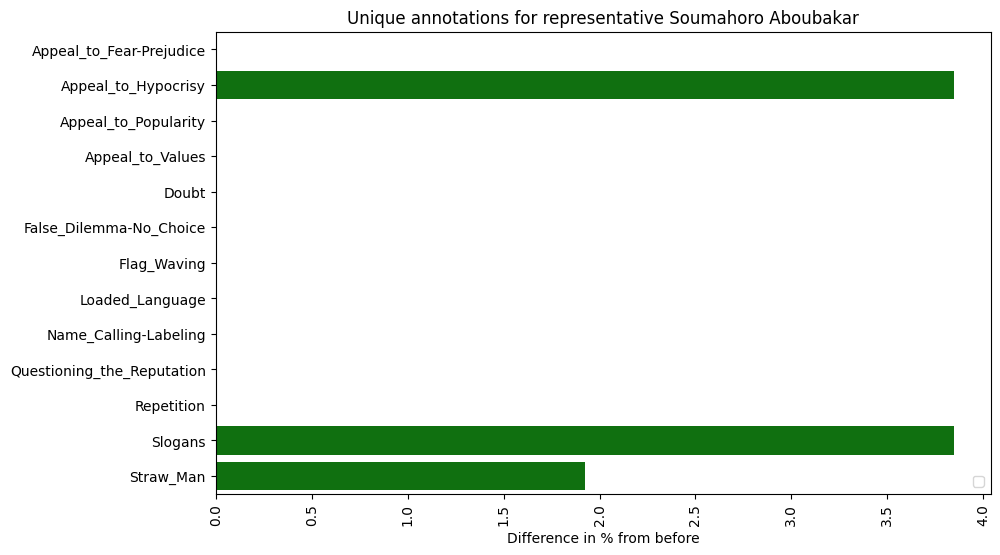

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


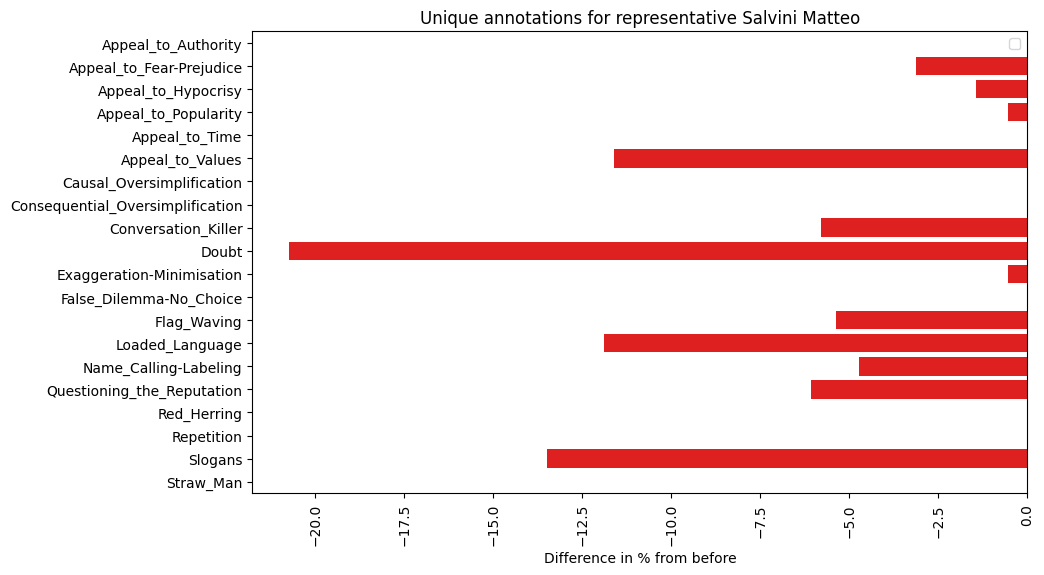

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


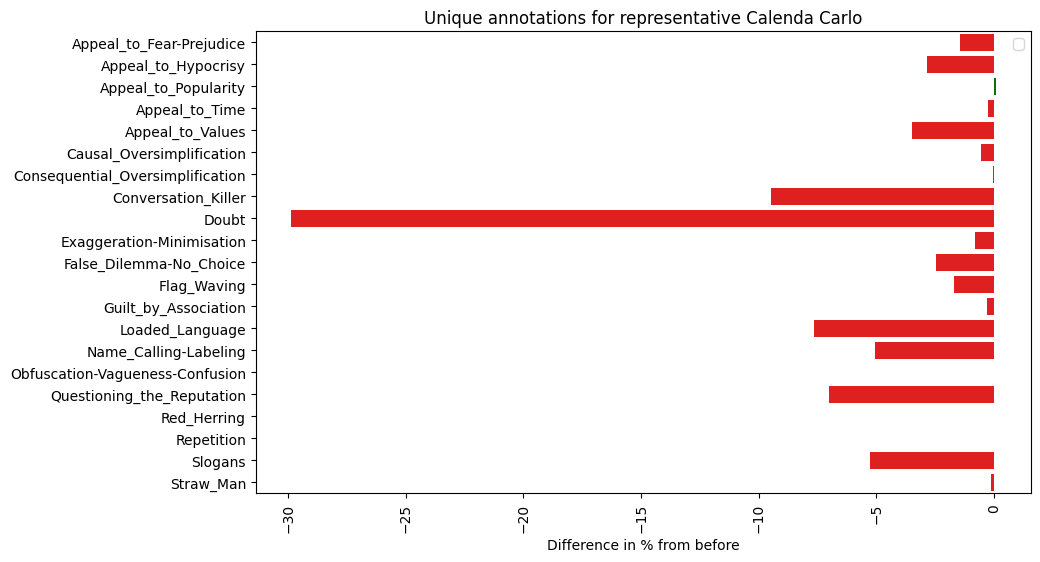

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


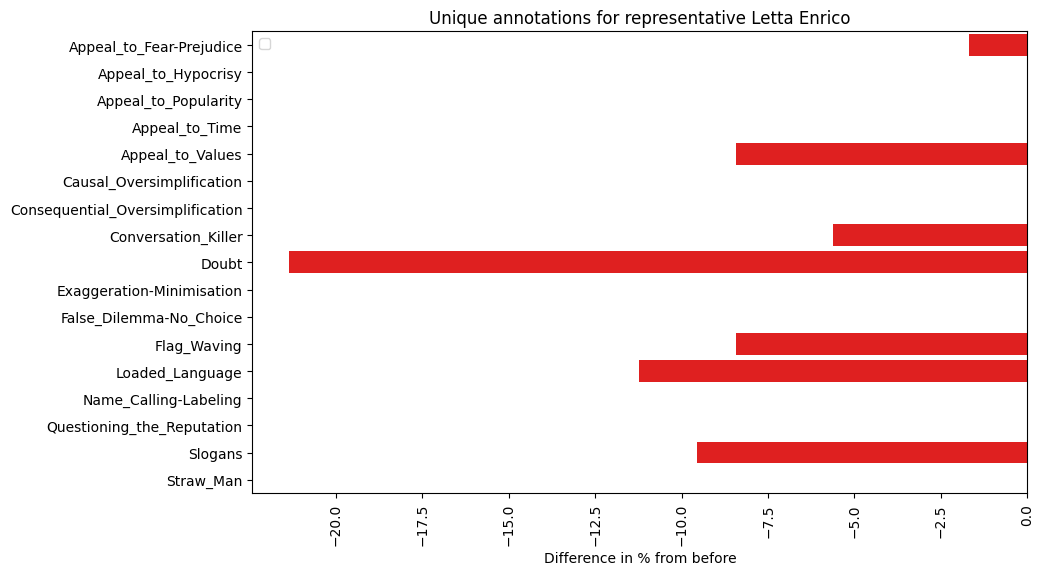

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


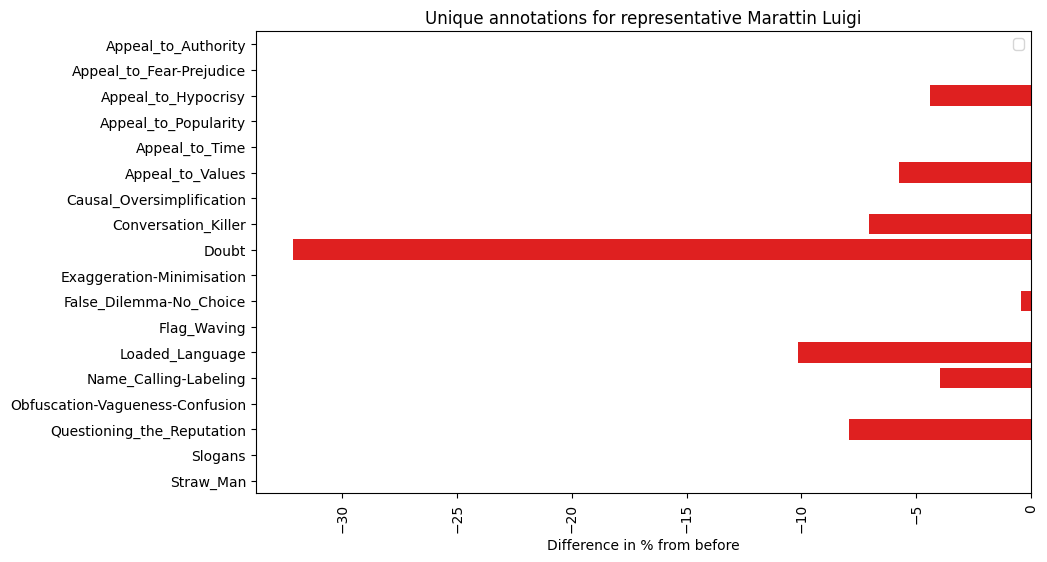

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


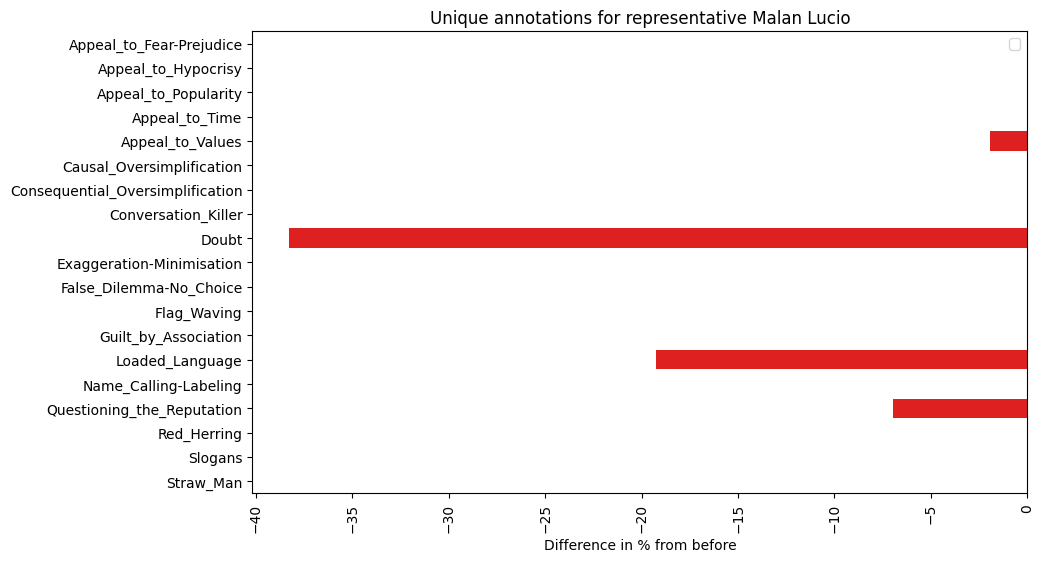

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


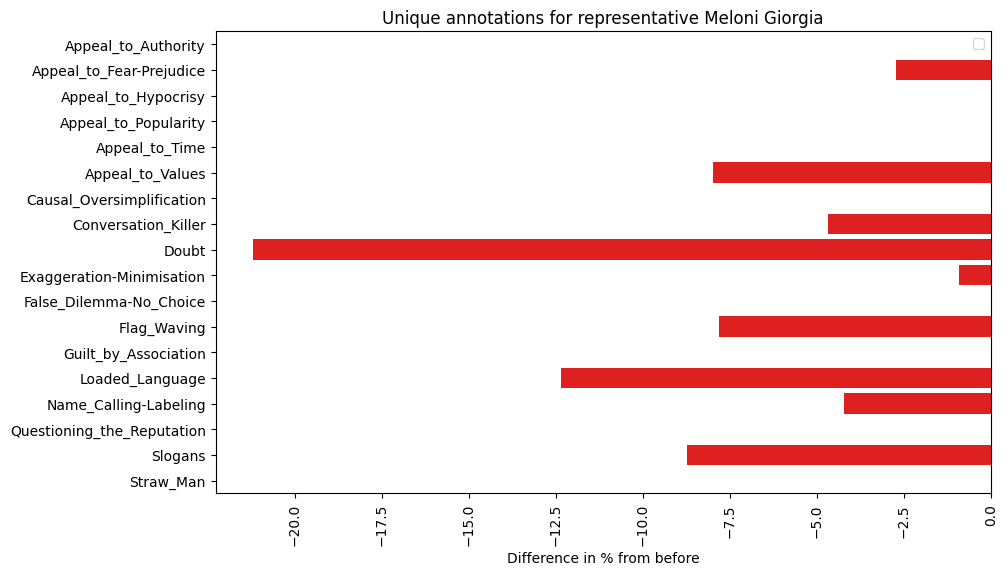

In [41]:
for name in names_interest_ba:
    # before
    name_annotations_before = df[(df["name"] == name) & (df["period"] == "before")]["annotations"].explode().value_counts()
    # during
    name_annotations_after = df[(df["name"] == name) & (df["period"] == "after")]["annotations"].explode().value_counts()

    # add 0s to techniques that are not present
    for tech in techniques:
        if tech not in name_annotations_before:
            name_annotations_before[tech] = 0
        if tech not in name_annotations_after:
            name_annotations_after[tech] = 0

    # % difference in annotations before and during
    name_annotations_diff = ((name_annotations_before - name_annotations_during) / name_annotations_before)*100

    # plot
    plt.figure(figsize=(10, 6))
    # color based on positive or negative difference
    color = ["red" if x < 0 else "green" for x in name_annotations_diff]
    sns.barplot(x=name_annotations_diff, y=name_annotations_diff.index, palette=color)
    plt.title('Unique annotations for representative '+name)
    plt.legend();
    plt.xticks(rotation=90)
    plt.xlabel('Difference in % from before')
    plt.show()